In [9]:
import scorecardpy as sc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import sidetable
import seaborn as sb

import csv
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import itertools as it
import numpy.matlib as nm
from sklearn import metrics
import sklearn.model_selection as ms
import sklearn.metrics as metrics
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn import linear_model
import matplotlib as mpl
import statsmodels.api as sm

In [11]:
df = pd.read_csv('data.csv')
df.head()

issue_d             purpose addr_state sub_grade home_ownership  \
0  4/1/2010      major_purchase         NY        B5           RENT   
1  4/1/2010  debt_consolidation         NY        C1           RENT   
2  4/1/2010  debt_consolidation         VA        B5       MORTGAGE   
3  4/1/2010  debt_consolidation         VA        B5       MORTGAGE   
4  4/1/2010    home_improvement         WA        A4           RENT   

                   emp_title    dti  funded_amnt  annual_inc  emp_length  ...  \
0               new york HRC   4.58         6000     60000.0         2.0  ...   
1   Harris RF Communications  13.98        12000     64450.0         3.0  ...   
2  AT&T Government Solutions  20.16        24000     90000.0         2.0  ...   
3  Information Analysis Inc.  22.05         6000     79500.0         1.0  ...   
4              US Government   0.94        10000     58608.0         4.0  ...   

   mths_since_recent_inq  delinq_2yrs  chargeoff_within_12_mths  \
0                    NaN            0                         0   
1                    NaN            0                         0   
2                    NaN            0                         0   
3                    NaN            0                         0   
4                    NaN            0                         0   

   num_accts_ever_120_pd  num_tl_90g_dpd_24m  acc_open_past_24mths  \
0                    NaN                 NaN                   NaN   
1                    NaN                 NaN                   NaN   
2                    NaN                 NaN                   NaN   
3                    NaN                 NaN                   NaN   
4                    NaN                 NaN                   NaN   

   avg_cur_bal  tot_hi_cred_lim  delinq_amnt  def  
0          NaN              NaN            0    0  
1          NaN              NaN            0    0  
2          NaN              NaN            0    0  
3          NaN              NaN            0    0  
4          NaN              NaN            0    0  

[5 rows x 22 columns]

In [5]:
df.shape

(61169, 22)

In [7]:
df.purpose.unique()

array(['major_purchase', 'debt_consolidation', 'home_improvement',
       'other', 'credit_card', 'educational', 'wedding', 'house',
       'small_business', 'moving', 'medical', 'car', 'vacation',
       'renewable_energy'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61169 entries, 0 to 61168
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   issue_d                   61169 non-null  object 
 1   purpose                   61169 non-null  object 
 2   addr_state                61169 non-null  object 
 3   sub_grade                 61169 non-null  object 
 4   home_ownership            61169 non-null  object 
 5   emp_title                 57304 non-null  object 
 6   dti                       61169 non-null  float64
 7   funded_amnt               61169 non-null  int64  
 8   annual_inc                61169 non-null  float64
 9   emp_length                58495 non-null  float64
 10  term                      61169 non-null  int64  
 11  inq_last_6mths            61169 non-null  int64  
 12  mths_since_recent_inq     47640 non-null  float64
 13  delinq_2yrs               61169 non-null  int64  
 14  charge

In [5]:
df['id'] = df.reset_index(drop=True).index + 1
df = df.reindex(columns=['id'] + [col for col in df.columns if col != 'id'])
df.head()

id   issue_d             purpose addr_state sub_grade home_ownership  \
0   1  4/1/2010      major_purchase         NY        B5           RENT   
1   2  4/1/2010  debt_consolidation         NY        C1           RENT   
2   3  4/1/2010  debt_consolidation         VA        B5       MORTGAGE   
3   4  4/1/2010  debt_consolidation         VA        B5       MORTGAGE   
4   5  4/1/2010    home_improvement         WA        A4           RENT   

                   emp_title    dti  funded_amnt  annual_inc  ...  \
0               new york HRC   4.58         6000     60000.0  ...   
1   Harris RF Communications  13.98        12000     64450.0  ...   
2  AT&T Government Solutions  20.16        24000     90000.0  ...   
3  Information Analysis Inc.  22.05         6000     79500.0  ...   
4              US Government   0.94        10000     58608.0  ...   

   mths_since_recent_inq  delinq_2yrs  chargeoff_within_12_mths  \
0                    NaN            0                         0   
1                    NaN            0                         0   
2                    NaN            0                         0   
3                    NaN            0                         0   
4                    NaN            0                         0   

   num_accts_ever_120_pd  num_tl_90g_dpd_24m  acc_open_past_24mths  \
0                    NaN                 NaN                   NaN   
1                    NaN                 NaN                   NaN   
2                    NaN                 NaN                   NaN   
3                    NaN                 NaN                   NaN   
4                    NaN                 NaN                   NaN   

   avg_cur_bal  tot_hi_cred_lim  delinq_amnt  def  
0          NaN              NaN            0    0  
1          NaN              NaN            0    0  
2          NaN              NaN            0    0  
3          NaN              NaN            0    0  
4          NaN              NaN            0    0  

[5 rows x 23 columns]

# EXPLORATORY DATA ANALYSIS, EDA

#### Descriptive statistics

In [7]:
pd.options.display.float_format ='{:,.4f}'.format

In [16]:
df.describe()

dti  funded_amnt     annual_inc  emp_length        term  \
count 61,169.0000  61,169.0000    61,169.0000 58,495.0000 61,169.0000   
mean      16.7828  14,159.6646    72,717.5471      6.0253     42.2761   
std        7.5319   8,181.1259    49,546.9765      3.5974     10.5470   
min        0.0000   1,000.0000     6,695.0000      0.0000     36.0000   
25%       11.1800   8,000.0000    45,000.0000      3.0000     36.0000   
50%       16.5000  12,000.0000    62,500.0000      6.0000     36.0000   
75%       22.2000  20,000.0000    88,000.0000     10.0000     60.0000   
max       34.9900  35,000.0000 3,900,000.0000     10.0000     60.0000   

       inq_last_6mths  mths_since_recent_inq  delinq_2yrs  \
count     61,169.0000            47,640.0000  61,169.0000   
mean           0.8313                 6.9631       0.2591   
std            1.0726                 5.8490       0.7613   
min            0.0000                 0.0000       0.0000   
25%            0.0000                 2.0000       0.0000   
50%            0.0000                 6.0000       0.0000   
75%            1.0000                10.0000       0.0000   
max            8.0000                24.0000      29.0000   

       chargeoff_within_12_mths  num_accts_ever_120_pd  num_tl_90g_dpd_24m  \
count               61,169.0000            49,228.0000         49,228.0000   
mean                     0.0065                 0.3899              0.0770   
std                      0.0897                 1.0655              0.4352   
min                      0.0000                 0.0000              0.0000   
25%                      0.0000                 0.0000              0.0000   
50%                      0.0000                 0.0000              0.0000   
75%                      0.0000                 0.0000              0.0000   
max                      3.0000                29.0000             20.0000   

       acc_open_past_24mths  avg_cur_bal  tot_hi_cred_lim  delinq_amnt  \
count           53,283.0000  49,224.0000      49,228.0000  61,169.0000   
mean                 4.0338  13,734.6410     167,155.6900      12.0906   
std                  2.6593  16,054.2216     169,920.1272     720.0551   
min                  0.0000       0.0000           0.0000       0.0000   
25%                  2.0000   3,025.0000      45,500.0000       0.0000   
50%                  4.0000   7,847.0000     111,069.5000       0.0000   
75%                  5.0000  19,527.0000     245,878.5000       0.0000   
max                 33.0000 354,015.0000   9,999,999.0000  70,076.0000   

              def  
count 61,169.0000  
mean       0.1596  
std        0.3662  
min        0.0000  
25%        0.0000  
50%        0.0000  
75%        0.0000  
max        1.0000

#### Descriptive statistics for categorical variables

In [13]:
df.describe(include=object)

issue_d             purpose addr_state sub_grade home_ownership  \
count      61169               61169      61169     61169          61169   
unique        50                  14         47        35              5   
top     5/1/2014  debt_consolidation         CA        B3       MORTGAGE   
freq        3785               35587       9689      4714          31414   

       emp_title  
count      57304  
unique     38576  
top      Teacher  
freq         505

### Distribution histograms

#### Distribution of defaults:

In [15]:
df.stb.freq(['def'], style = True)

In [17]:
type(df)

pandas.core.frame.DataFrame

C:\Users\annaz\AppData\Local\Temp\ipykernel_1708\1909520437.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='def', data=df, palette='Set2')


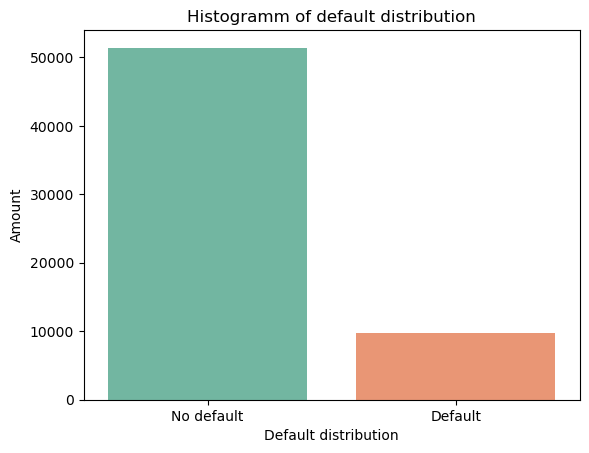

In [22]:
sb.countplot(x='def', data=df, palette='Set2')
plt.xticks([0, 1], ['No default', 'Default'])
plt.xlabel('Default distribution')
plt.ylabel('Amount')
plt.title('Histogramm of default distribution')
plt.show()

#### Distribution of purposes:

In [24]:
df.stb.freq(['purpose'], style = True)

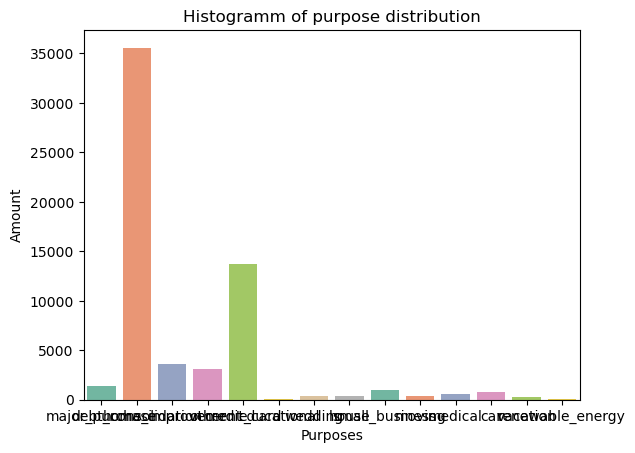

In [1113]:
sb.countplot(x='purpose', data=df, palette='Set2')
#plt.xticks(name(df.purpose))
plt.xlabel('Purposes')
plt.ylabel('Amount')
plt.title('Histogramm of purpose distribution')
plt.show()

Analysing the purposes for borrowers, we can conclude that most often they took out loans for debt consolidation and using credit card.

Debt consolidation is a financial process in which multiple debts (such as loans, credit cards, and other obligations) are combined into one new debt with one payment. This makes debt easier to manage and may also result in lower interest rates and smaller monthly payments.

#### Distributions of other variables

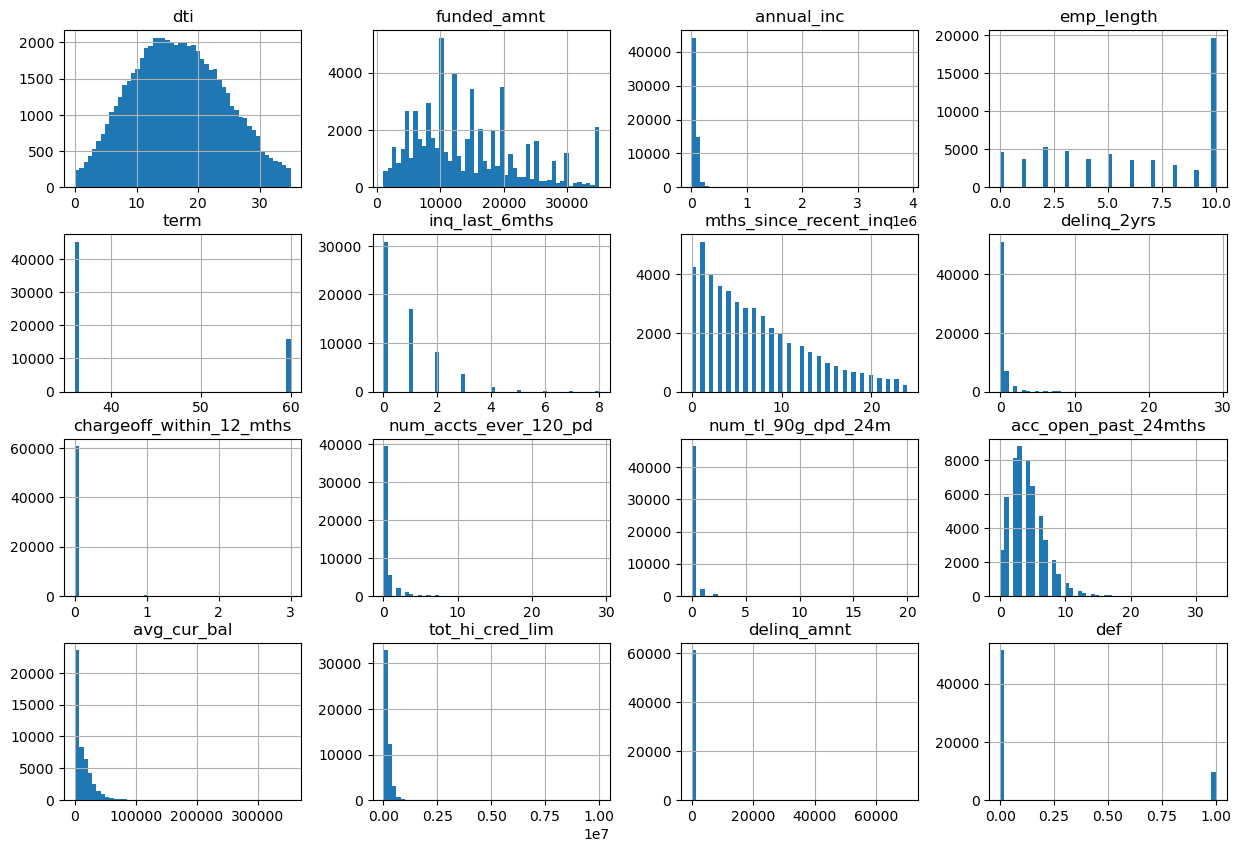

In [1117]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

Variables doesn't destributed normal. Only dti tends to normal distribution.

Also, according to the bar charts, there are can be outliers in next variables:

annual_inc
delinq_2yrs
chargeoff_within_12_mths
num_accts_ever_120_pd
num_tl_90g_dpd_24m
acc_open_past_24mths
avg_cur_bal
tot_hi_cred_lim
delinq_amnt

## Outliers detection

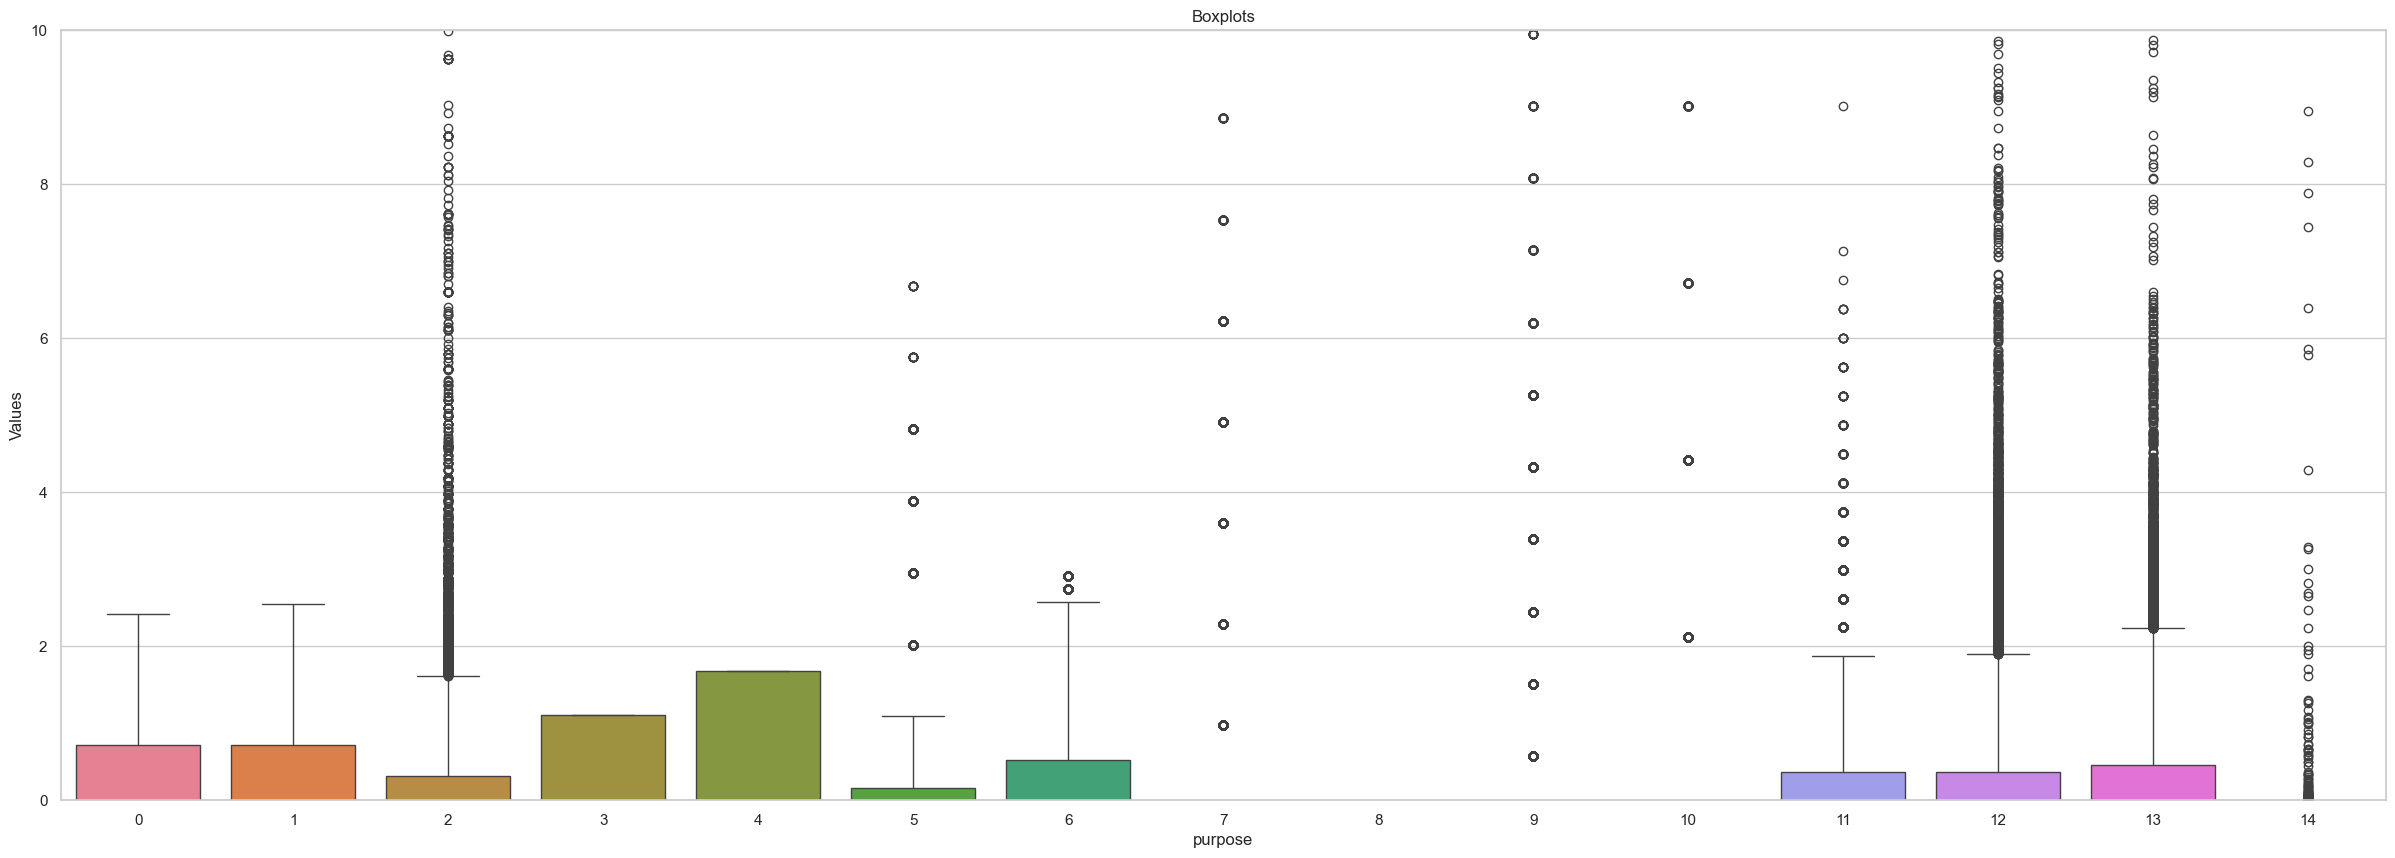

In [1150]:
## only numeric variables
features=pd.DataFrame(df, columns=['dti', 'funded_amnt', 'annual_inc', 'emp_length', 'term',
       'inq_last_6mths', 'mths_since_recent_inq', 'delinq_2yrs',
       'chargeoff_within_12_mths', 'num_accts_ever_120_pd',
       'num_tl_90g_dpd_24m', 'acc_open_past_24mths', 'avg_cur_bal',
       'tot_hi_cred_lim', 'delinq_amnt'])

## f_st - scaled features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
f_st = scaler.fit_transform(features)

import matplotlib.pyplot as plt
sb.set(style="whitegrid")
        
plt.figure(figsize=(30, 10))
sb.boxplot(data=f_st)
#sb.boxplot(data=(df.annual_inc, df.annual_inc))

plt.title('Boxplots')
plt.xlabel('purpose')
plt.ylabel('Values')
plt.ylim(0, 10)

plt.show()

There are a lot of missing values, we will fill it later on train and test samples separately with the most frequently values. Do it later, because don't want train sample is connected to test sample.

# Delete data and emp_title
 Also I think we don't need this features (it's unable to create dummies or encode it)(and with encoded them result is not better).

In [9]:
del df['issue_d']
del df['addr_state'] # I delete it as it's incorrect use encoder for location (as it doesn't take into account the distance between states)
## dummies - too many (47)
del df['emp_title']

In [15]:
df.head()

id             purpose sub_grade home_ownership    dti  funded_amnt  \
0   1      major_purchase        B5           RENT   4.58         6000   
1   2  debt_consolidation        C1           RENT  13.98        12000   
2   3  debt_consolidation        B5       MORTGAGE  20.16        24000   
3   4  debt_consolidation        B5       MORTGAGE  22.05         6000   
4   5    home_improvement        A4           RENT   0.94        10000   

   annual_inc  emp_length  term  inq_last_6mths  mths_since_recent_inq  \
0     60000.0         2.0    36               0                    NaN   
1     64450.0         3.0    36               0                    NaN   
2     90000.0         2.0    36               2                    NaN   
3     79500.0         1.0    36               2                    NaN   
4     58608.0         4.0    36               0                    NaN   

   delinq_2yrs  chargeoff_within_12_mths  num_accts_ever_120_pd  \
0            0                         0                    NaN   
1            0                         0                    NaN   
2            0                         0                    NaN   
3            0                         0                    NaN   
4            0                         0                    NaN   

   num_tl_90g_dpd_24m  acc_open_past_24mths  avg_cur_bal  tot_hi_cred_lim  \
0                 NaN                   NaN          NaN              NaN   
1                 NaN                   NaN          NaN              NaN   
2                 NaN                   NaN          NaN              NaN   
3                 NaN                   NaN          NaN              NaN   
4                 NaN                   NaN          NaN              NaN   

   delinq_amnt  def  
0            0    0  
1            0    0  
2            0    0  
3            0    0  
4            0    0

# Categorical features (dummies and encoder)

In [11]:
df = pd.get_dummies(df, drop_first=True)
print("Columns: {}".format(df.shape[1]))
df.head()

Columns: 68


id     dti  funded_amnt  annual_inc  emp_length  term  inq_last_6mths  \
0   1  4.5800         6000 60,000.0000      2.0000    36               0   
1   2 13.9800        12000 64,450.0000      3.0000    36               0   
2   3 20.1600        24000 90,000.0000      2.0000    36               2   
3   4 22.0500         6000 79,500.0000      1.0000    36               2   
4   5  0.9400        10000 58,608.0000      4.0000    36               0   

   mths_since_recent_inq  delinq_2yrs  chargeoff_within_12_mths  ...  \
0                    NaN            0                         0  ...   
1                    NaN            0                         0  ...   
2                    NaN            0                         0  ...   
3                    NaN            0                         0  ...   
4                    NaN            0                         0  ...   

   sub_grade_F5  sub_grade_G1  sub_grade_G2  sub_grade_G3  sub_grade_G4  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

   sub_grade_G5  home_ownership_NONE  home_ownership_OTHER  \
0         False                False                 False   
1         False                False                 False   
2         False                False                 False   
3         False                False                 False   
4         False                False                 False   

   home_ownership_OWN  home_ownership_RENT  
0               False                 True  
1               False                 True  
2               False                False  
3               False                False  
4               False                 True  

[5 rows x 68 columns]

In [13]:
## hidden categorical values
list_uniq = []
list_len_uniq = []

for i in df.columns:
  a = df[i].unique()

  list_uniq.append(a)
  list_len_uniq.append(len(a))

Want to see the patential categorical values.
Most of the data has 2 values ​​because I just made a dummy.

But those variables that only have 4 unique values ​​- could potentially be categorical variables

<Axes: >

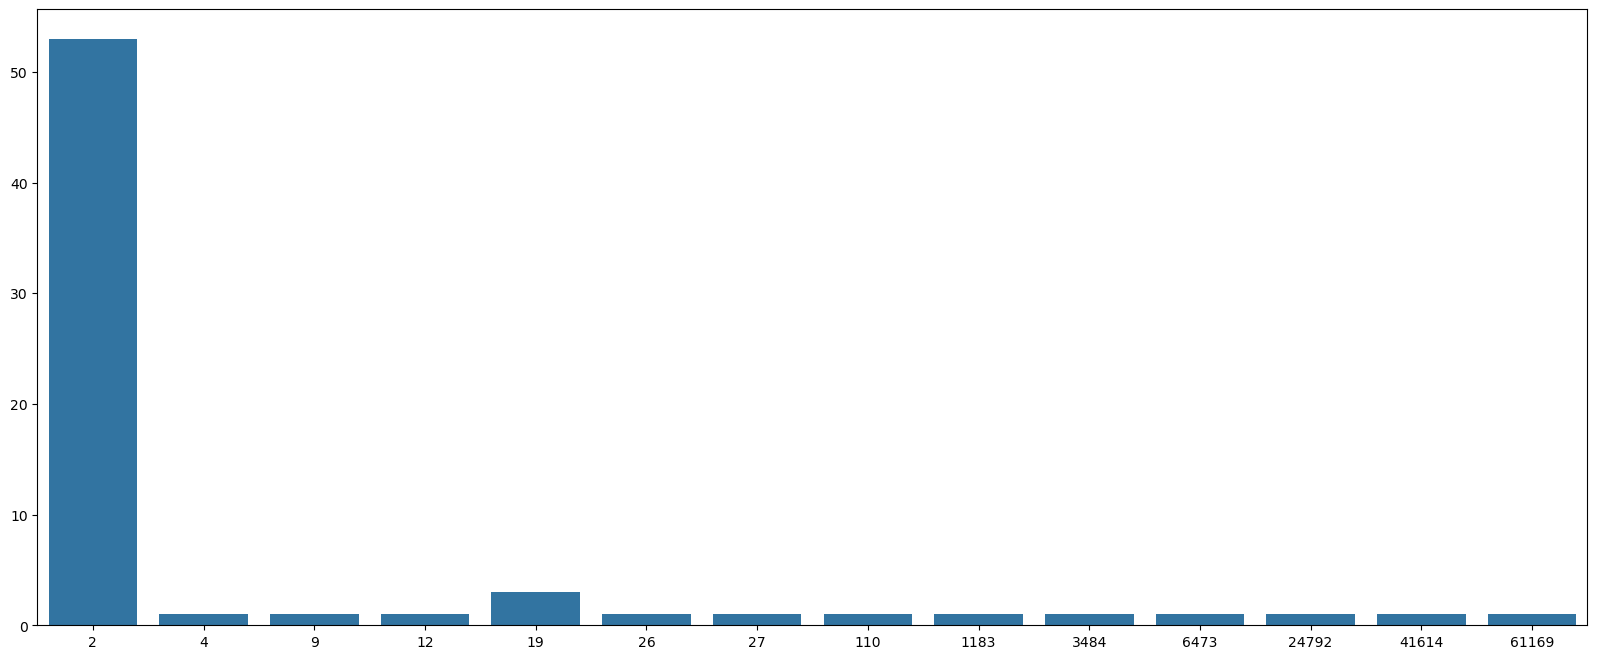

In [39]:
hist_unique = np.unique(list_len_uniq, return_counts=True)
hist_unique
plt.figure(figsize=(20, 8))
sb.barplot(x = hist_unique[0], y = hist_unique[1])

In [15]:
print(df.inq_last_6mths.unique())
print(df.chargeoff_within_12_mths.unique())
# I don't think there're dummies

[0 2 1 4 3 5 8 6 7]
[0 1 2 3]


# Train Test split (80%)

In [17]:
train, test = sc.split_df(df, 'def', ratio=0.8).values()
test.head()

id     dti  funded_amnt  annual_inc  emp_length  term  inq_last_6mths  \
1    2 13.9800        12000 64,450.0000      3.0000    36               0   
3    4 22.0500         6000 79,500.0000      1.0000    36               2   
10  11 21.1700        10000 42,000.0000     10.0000    36               0   
20  21 18.9600        15000 49,439.0000         NaN    36               0   
33  34 18.6800        12000 64,700.0000      4.0000    36               0   

    mths_since_recent_inq  delinq_2yrs  chargeoff_within_12_mths  ...  \
1                     NaN            0                         0  ...   
3                     NaN            0                         0  ...   
10                    NaN            0                         0  ...   
20                    NaN            0                         0  ...   
33                    NaN            0                         0  ...   

    sub_grade_F5  sub_grade_G1  sub_grade_G2  sub_grade_G3  sub_grade_G4  \
1          False         False         False         False         False   
3          False         False         False         False         False   
10         False         False         False         False         False   
20         False         False         False         False         False   
33         False         False         False         False         False   

    sub_grade_G5  home_ownership_NONE  home_ownership_OTHER  \
1          False                False                 False   
3          False                False                 False   
10         False                False                 False   
20         False                False                 False   
33         False                False                 False   

    home_ownership_OWN  home_ownership_RENT  
1                False                 True  
3                False                False  
10               False                False  
20               False                 True  
33               False                False  

[5 rows x 68 columns]

In [26]:
train.isnull().sum()

id                         0
dti                        0
funded_amnt                0
annual_inc                 0
emp_length              2177
                        ... 
sub_grade_G5               0
home_ownership_NONE        0
home_ownership_OTHER       0
home_ownership_OWN         0
home_ownership_RENT        0
Length: 68, dtype: int64

# Feature engeneering

## Removing 

Looking for and delete variables that contain less than 80% 0f the values ​​of the entire dataframe

In [18]:
for i in train.iloc[:, :-1].columns:
    if train[i].notna().sum()<0.8*len(train):
        print(train[i])
        del train[i]

0           NaN
2           NaN
4           NaN
5           NaN
6           NaN
          ...  
61163    6.0000
61164       NaN
61165    8.0000
61166   16.0000
61167    3.0000
Name: mths_since_recent_inq, Length: 48936, dtype: float64


In [19]:
del test['mths_since_recent_inq']

In [33]:
train.shape, test.shape

((48936, 67), (12233, 67))

## Missing input:

Let's fill in the missing values ​​with the most frequently occurring values ​​of the variable, i.e. the mode.

For the "emp_title" variable which means job, it seemes incorrect to fill in the value with the mode ("Teacher") or other measures of central tendency. Therefore, for the "emp_title"( it was deleted) variable, we will create a new value "Other".

In [23]:
st

missing  total  percent
avg_cur_bal               9549  48936  19.5132
num_tl_90g_dpd_24m        9546  48936  19.5071
num_accts_ever_120_pd     9546  48936  19.5071
tot_hi_cred_lim           9546  48936  19.5071
acc_open_past_24mths      6289  48936  12.8515
...                        ...    ...      ...
sub_grade_A4                 0  48936   0.0000
sub_grade_A5                 0  48936   0.0000
dti                          0  48936   0.0000
sub_grade_B2                 0  48936   0.0000
home_ownership_RENT          0  48936   0.0000

[67 rows x 3 columns]

## Fill missings with mode


In [25]:
train_m=pd.DataFrame(train)
test_m=pd.DataFrame(test)

In [42]:
train_m.shape, test_m.shape

((48936, 67), (12233, 67))

I decided make dummies.

In [ ]:
# #Other method:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# train_m['purpose'] = labelencoder.fit_transform(train_m['purpose'])
# train_m['addr_state'] = labelencoder.fit_transform(train_m['addr_state'])
# train_m['sub_grade'] = labelencoder.fit_transform(train_m['sub_grade'])
# train_m['home_ownership'] = labelencoder.fit_transform(train_m['home_ownership'])
# train_m.dtypes

# labelencoder = LabelEncoder()
# test_m['purpose'] = labelencoder.fit_transform(test_m['purpose'])
# test_m['addr_state'] = labelencoder.fit_transform(test_m['addr_state'])
# test_m['sub_grade'] = labelencoder.fit_transform(test_m['sub_grade'])
# test_m['home_ownership'] = labelencoder.fit_transform(test_m['home_ownership'])
# test_m.dtypes

In [27]:
train_m.emp_length = train_m.emp_length.fillna(train_m.emp_length.mode()[0])
train_m.num_accts_ever_120_pd = train_m.num_accts_ever_120_pd.fillna(train_m.num_accts_ever_120_pd.mode()[0])
train_m.num_tl_90g_dpd_24m = train_m.num_tl_90g_dpd_24m.fillna(train_m.num_tl_90g_dpd_24m.mode()[0])
train_m.acc_open_past_24mths = train_m.acc_open_past_24mths.fillna(train_m.acc_open_past_24mths.mode()[0])
train_m.avg_cur_bal = train_m.avg_cur_bal.fillna(train_m.avg_cur_bal.mode()[0])
train_m.tot_hi_cred_lim = train_m.tot_hi_cred_lim.fillna(train_m.tot_hi_cred_lim.mode()[0])
#train_m['emp_title'] = train_m['emp_title'].fillna(value = 'Other')

test_m.emp_length = test_m.emp_length.fillna(test_m.emp_length.mode()[0])
test_m.num_accts_ever_120_pd = test_m.num_accts_ever_120_pd.fillna(test_m.num_accts_ever_120_pd.mode()[0])
test_m.num_tl_90g_dpd_24m = test_m.num_tl_90g_dpd_24m.fillna(test_m.num_tl_90g_dpd_24m.mode()[0])
test_m.acc_open_past_24mths = test_m.acc_open_past_24mths.fillna(test_m.acc_open_past_24mths.mode()[0])
test_m.avg_cur_bal = test_m.avg_cur_bal.fillna(test_m.avg_cur_bal.mode()[0])
test_m.tot_hi_cred_lim = test_m.tot_hi_cred_lim.fillna(test_m.tot_hi_cred_lim.mode()[0])
#test_m['emp_title'] = test_m['emp_title'].fillna(value = 'Other')

In [46]:
train_m.columns

Index(['id', 'dti', 'funded_amnt', 'annual_inc', 'emp_length', 'term',
       'inq_last_6mths', 'delinq_2yrs', 'chargeoff_within_12_mths',
       'num_accts_ever_120_pd', 'num_tl_90g_dpd_24m', 'acc_open_past_24mths',
       'avg_cur_bal', 'tot_hi_cred_lim', 'delinq_amnt', 'def',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
    

## WOE binning

In [48]:
train_m.shape

(48936, 67)

In [29]:
#!pip install scorecardpy
#!pip install monotonic-binning
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning
train_m.isnull().sum()

id                      0
dti                     0
funded_amnt             0
annual_inc              0
emp_length              0
                       ..
sub_grade_G5            0
home_ownership_NONE     0
home_ownership_OTHER    0
home_ownership_OWN      0
home_ownership_RENT     0
Length: 67, dtype: int64

[INFO] creating woe binning ...
Binning on 48936 rows and 67 columns in 00:00:27
[INFO] creating woe binning ...
Binning on 12233 rows and 67 columns in 00:00:15


{'sub_grade_A4': <Figure size 640x480 with 2 Axes>,
 'sub_grade_A2': <Figure size 640x480 with 2 Axes>,
 'sub_grade_D4': <Figure size 640x480 with 2 Axes>,
 'delinq_amnt': <Figure size 640x480 with 2 Axes>,
 'purpose_home_improvement': <Figure size 640x480 with 2 Axes>,
 'purpose_moving': <Figure size 640x480 with 2 Axes>,
 'purpose_credit_card': <Figure size 640x480 with 2 Axes>,
 'sub_grade_G1': <Figure size 640x480 with 2 Axes>,
 'sub_grade_C2': <Figure size 640x480 with 2 Axes>,
 'sub_grade_F4': <Figure size 640x480 with 2 Axes>,
 'term': <Figure size 640x480 with 2 Axes>,
 'purpose_debt_consolidation': <Figure size 640x480 with 2 Axes>,
 'home_ownership_OTHER': <Figure size 640x480 with 2 Axes>,
 'sub_grade_A3': <Figure size 640x480 with 2 Axes>,
 'inq_last_6mths': <Figure size 640x480 with 2 Axes>,
 'sub_grade_B5': <Figure size 640x480 with 2 Axes>,
 'sub_grade_F2': <Figure size 640x480 with 2 Axes>,
 'sub_grade_D1': <Figure size 640x480 with 2 Axes>,
 'delinq_2yrs': <Figure size

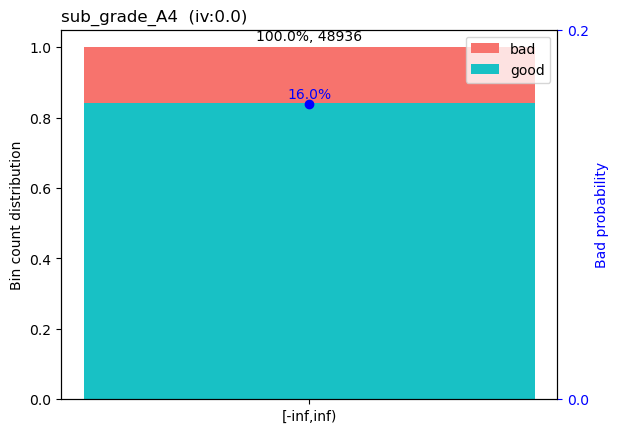

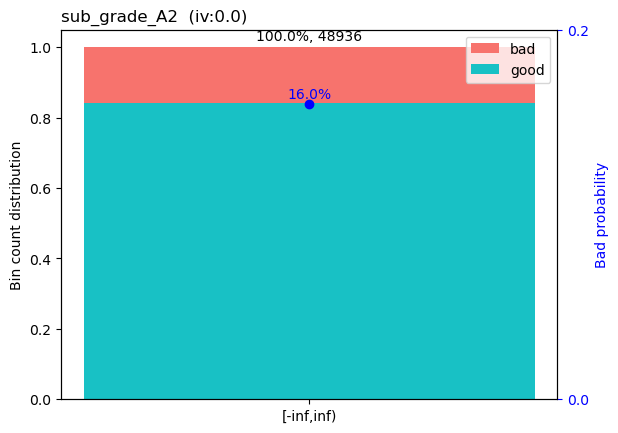

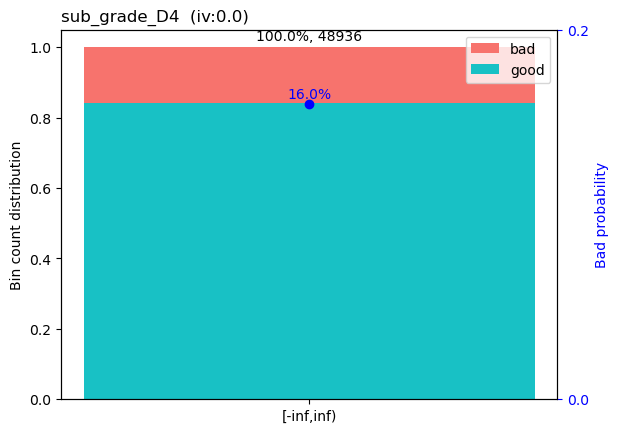

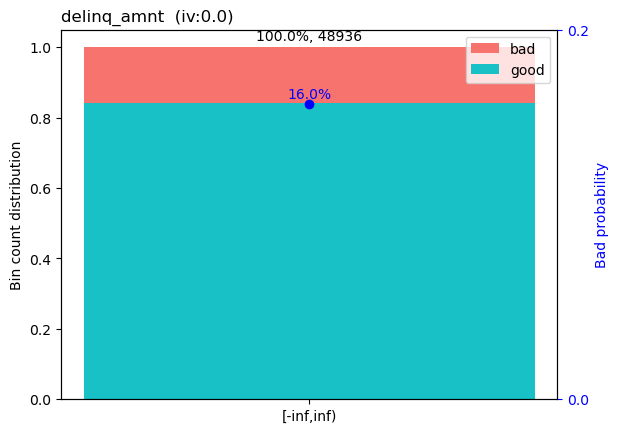

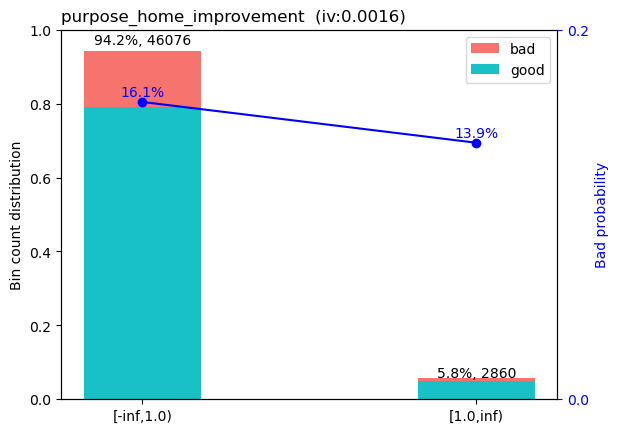

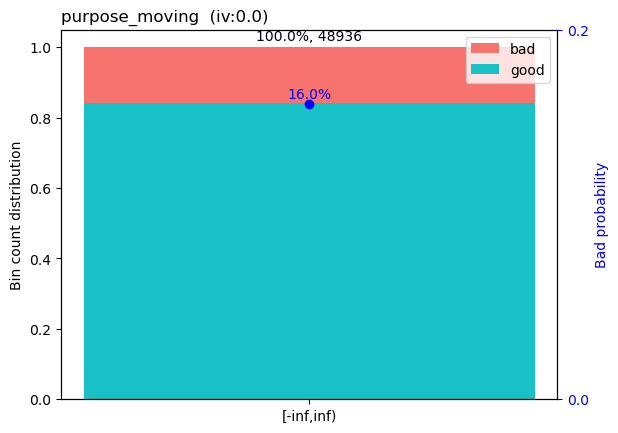

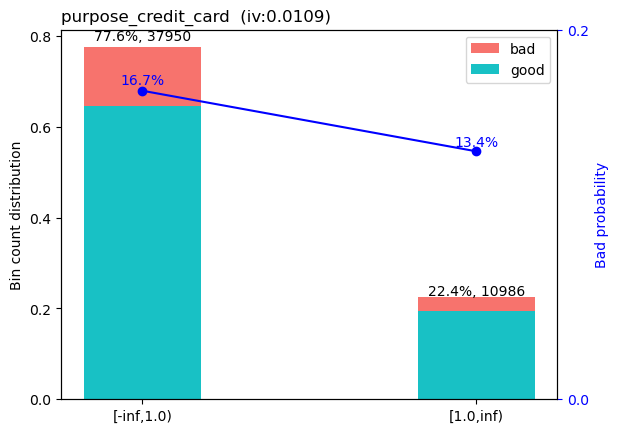

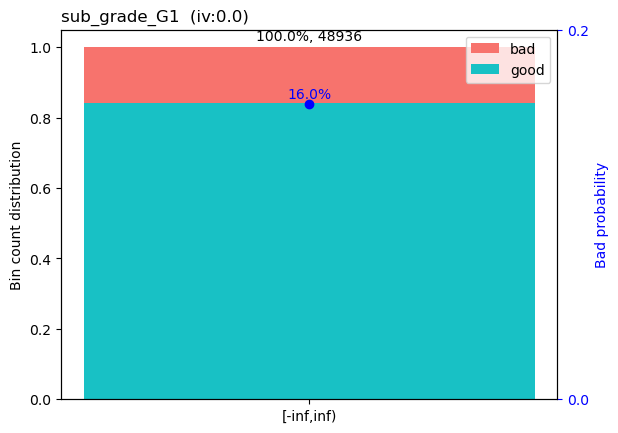

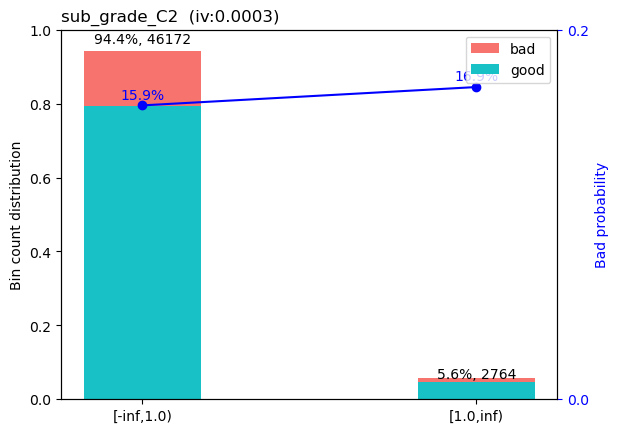

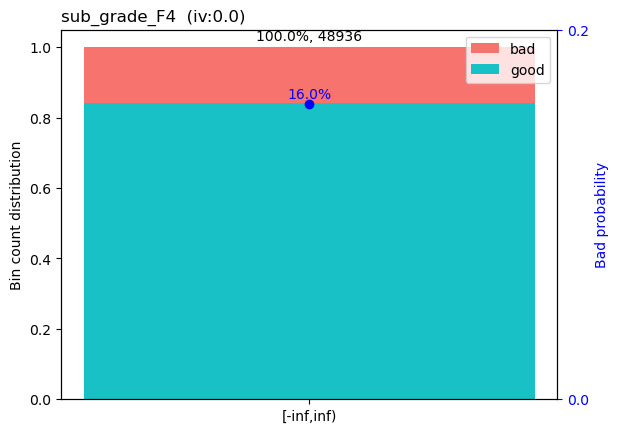

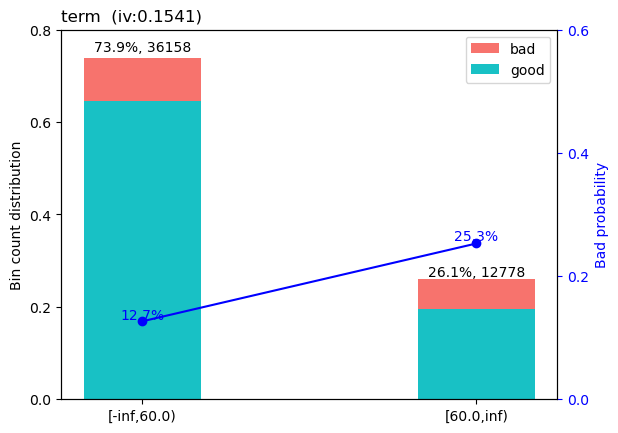

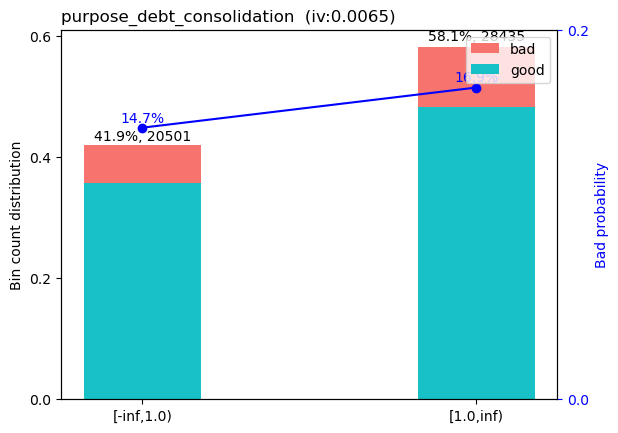

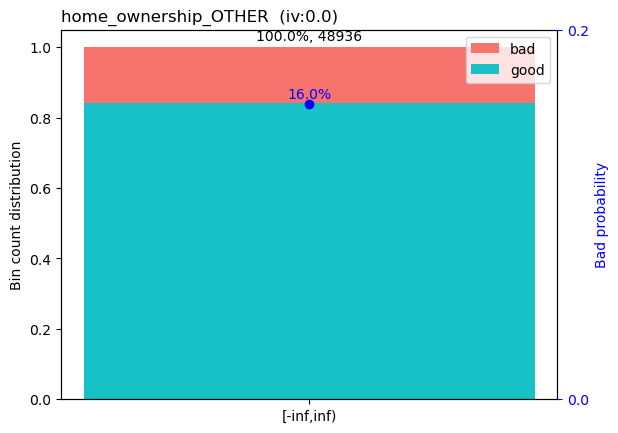

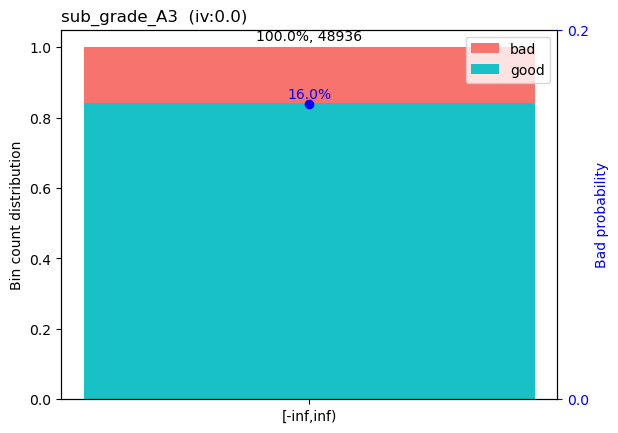

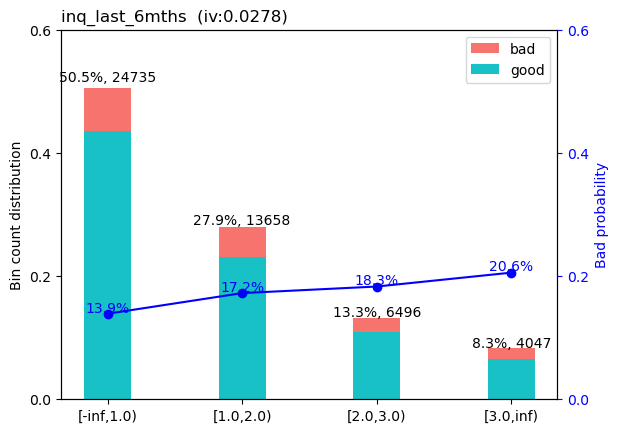

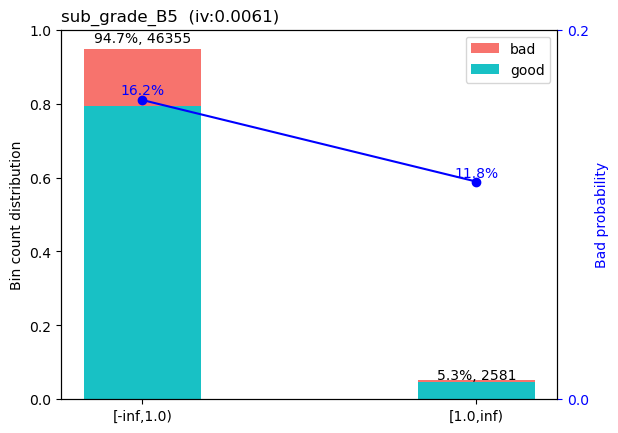

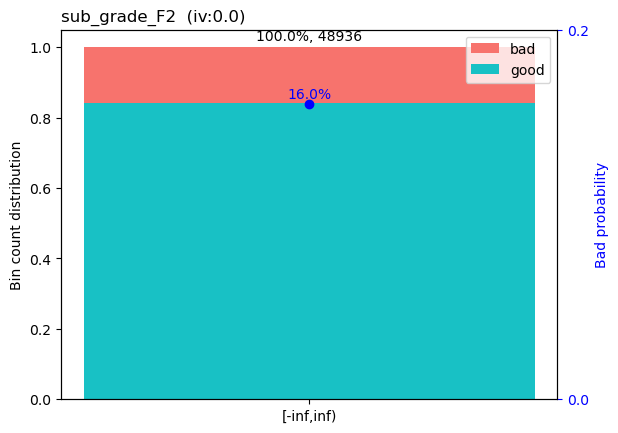

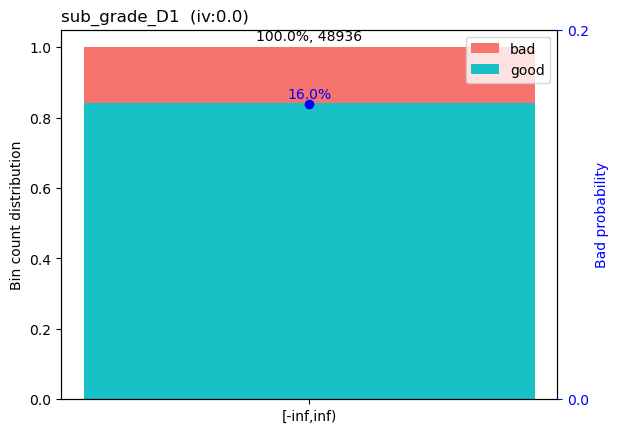

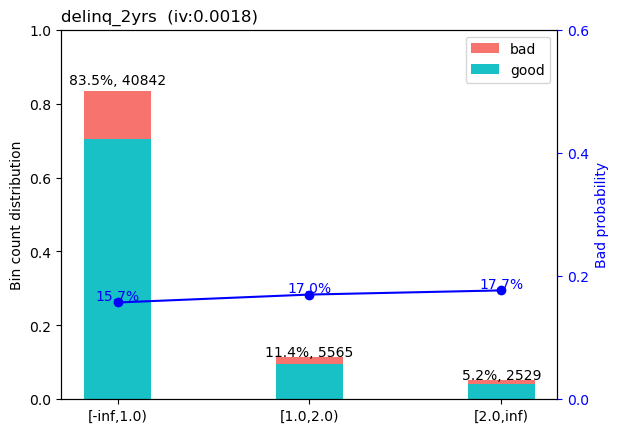

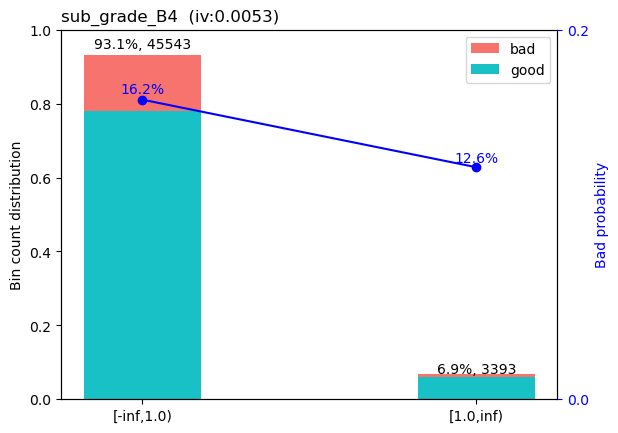

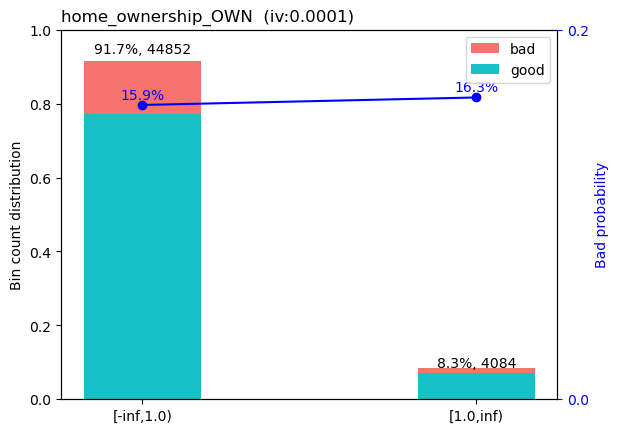

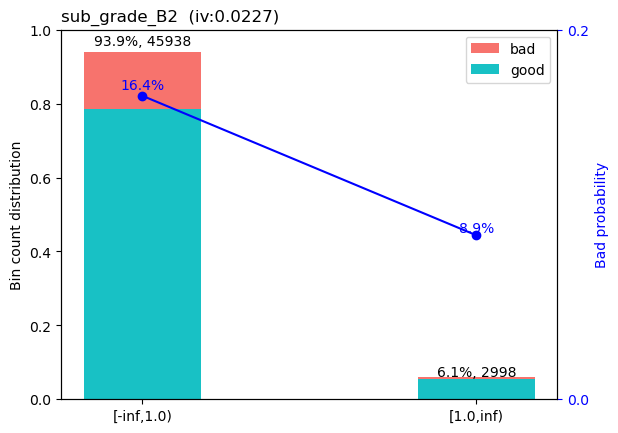

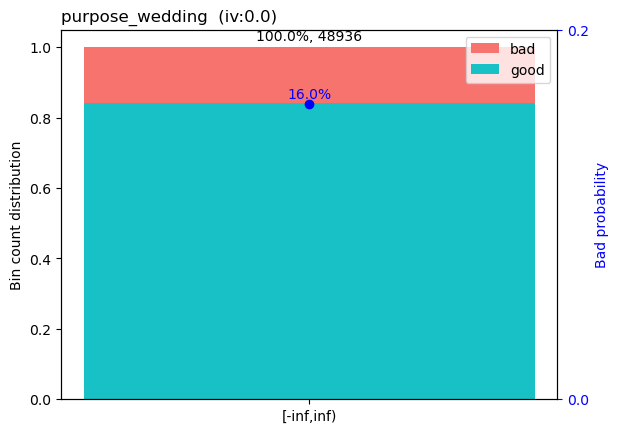

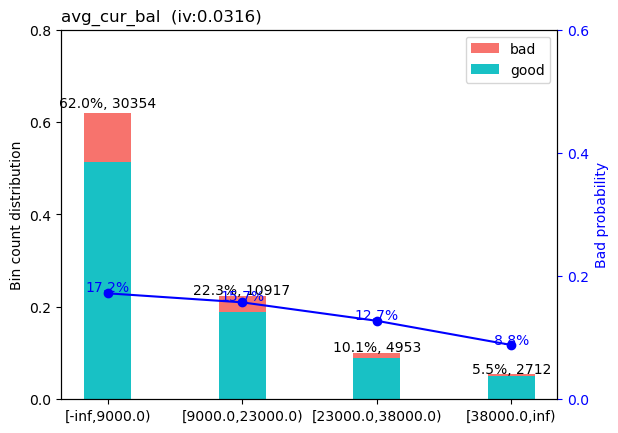

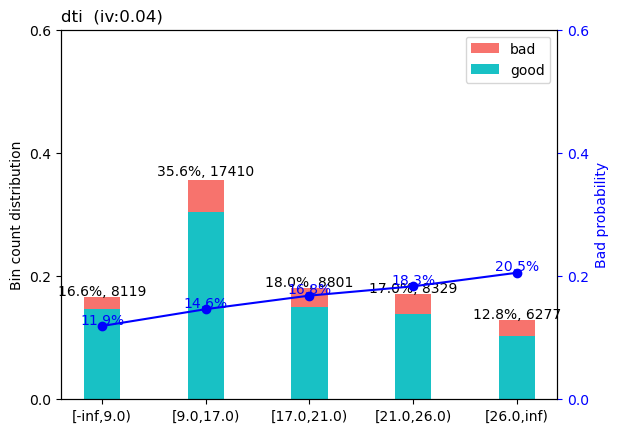

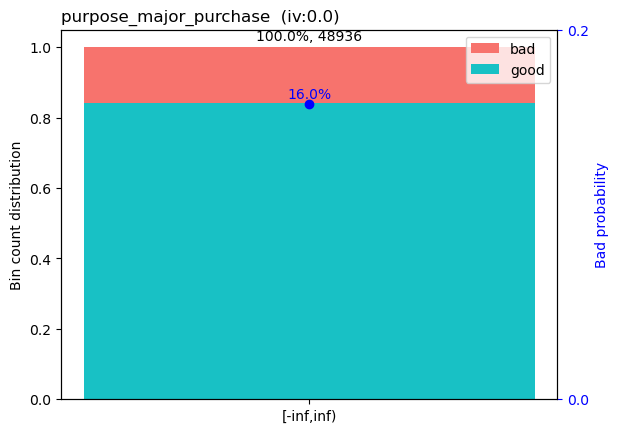

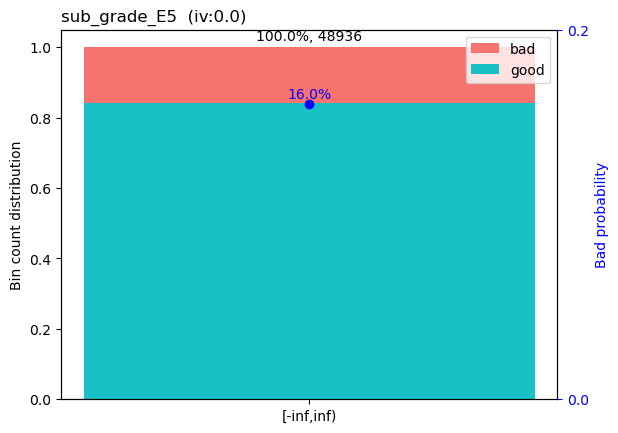

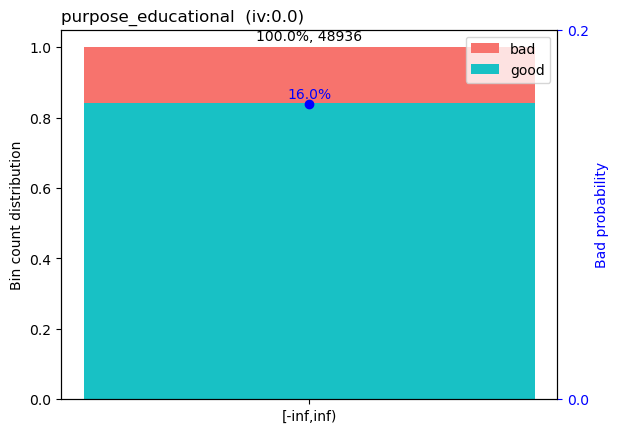

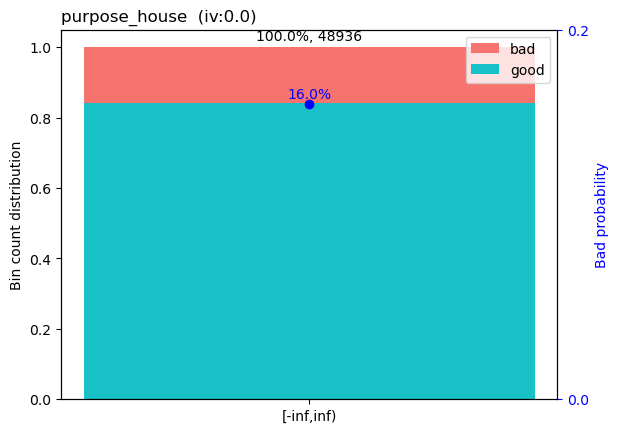

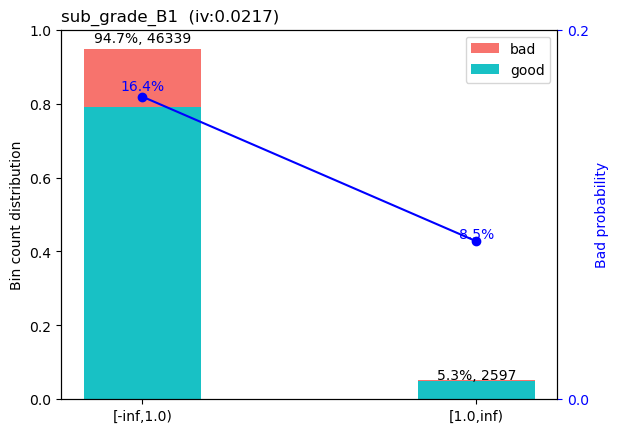

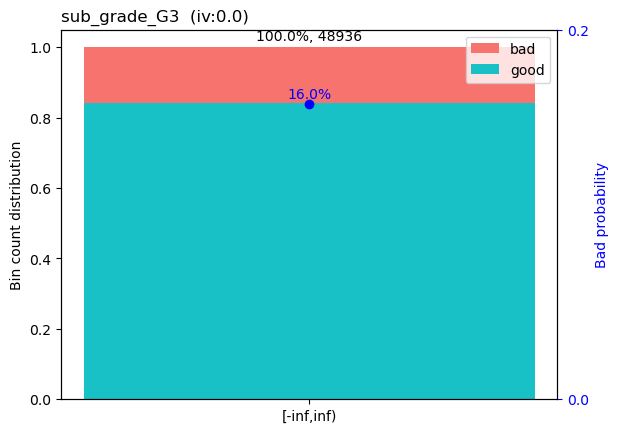

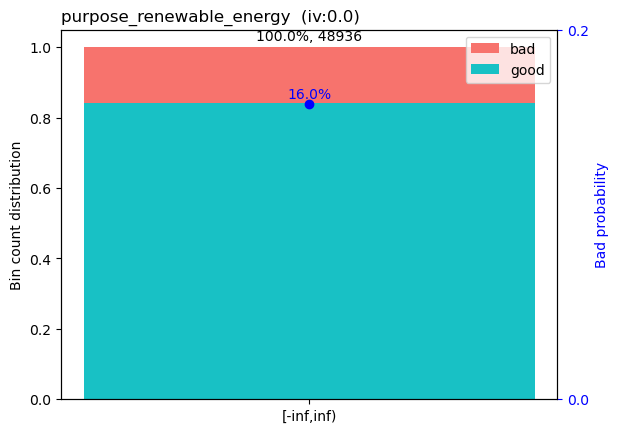

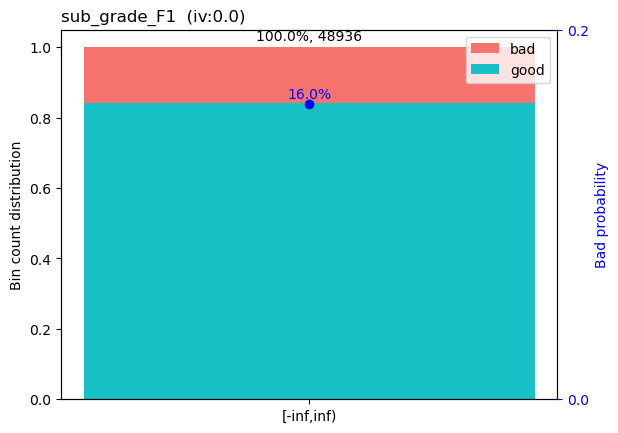

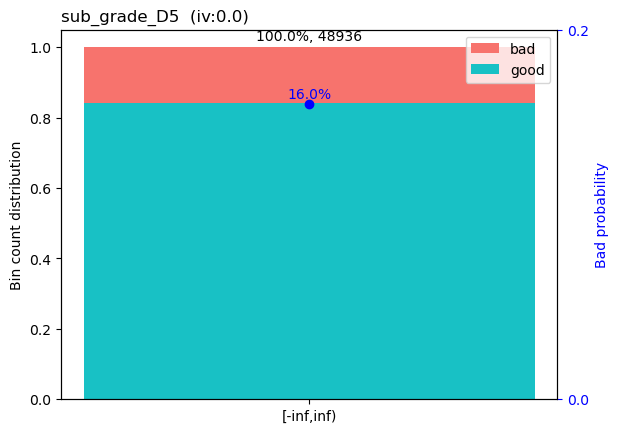

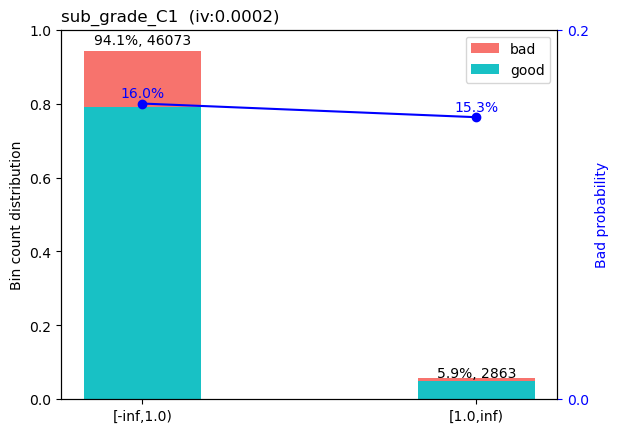

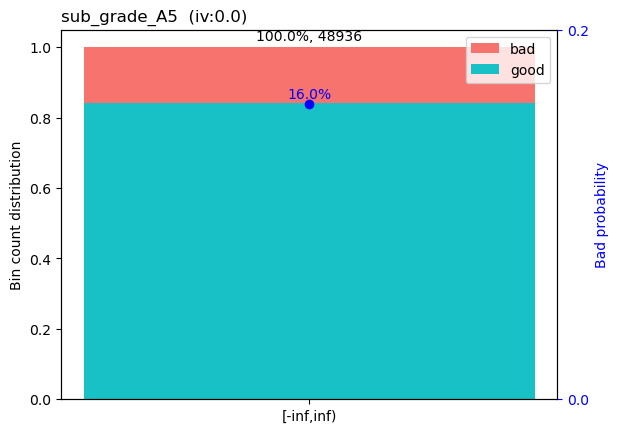

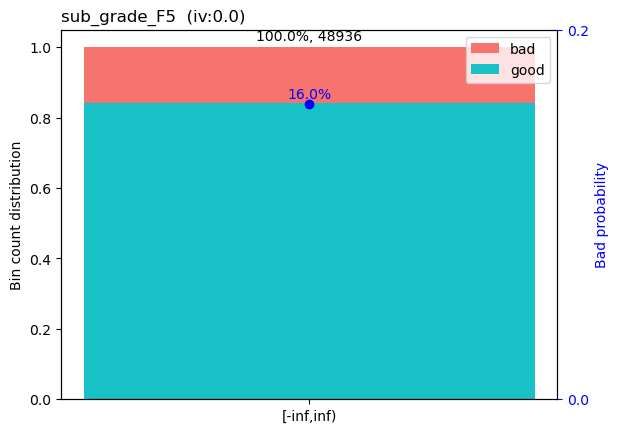

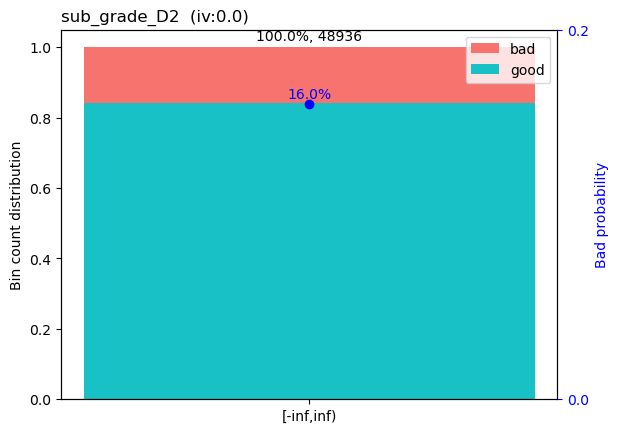

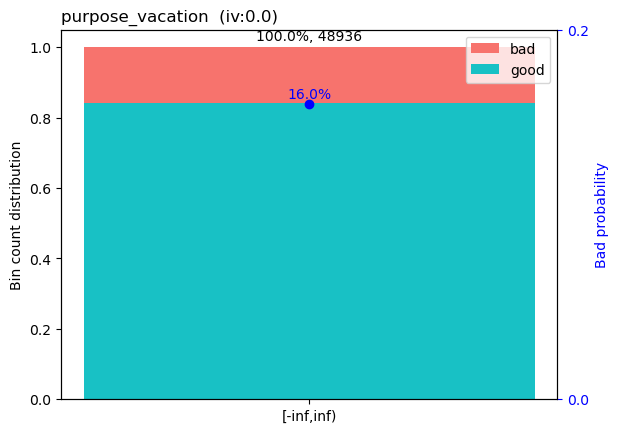

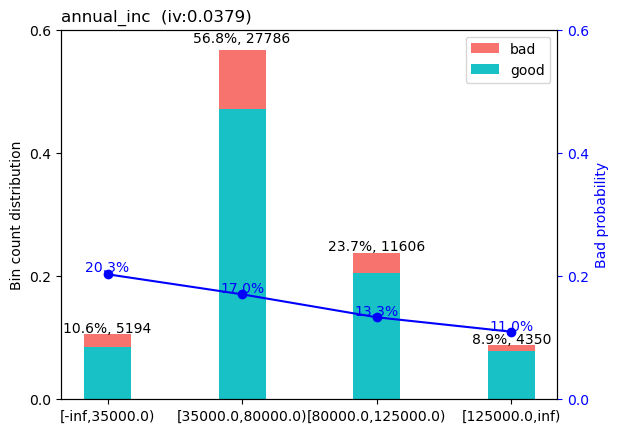

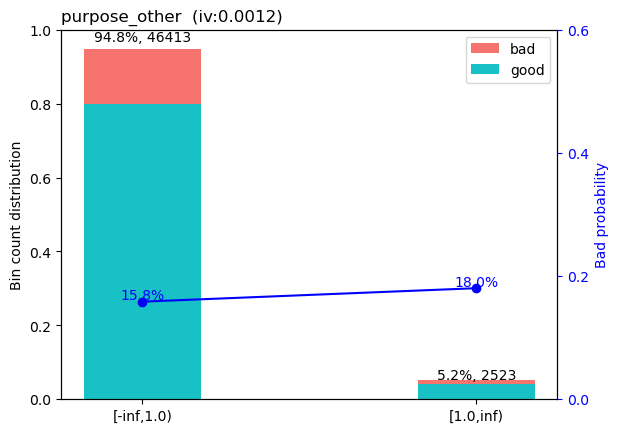

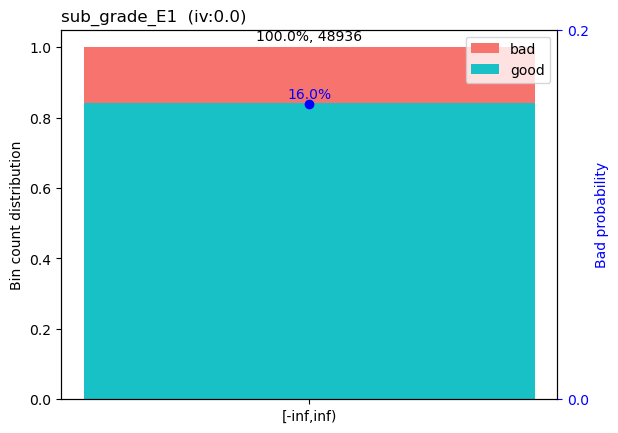

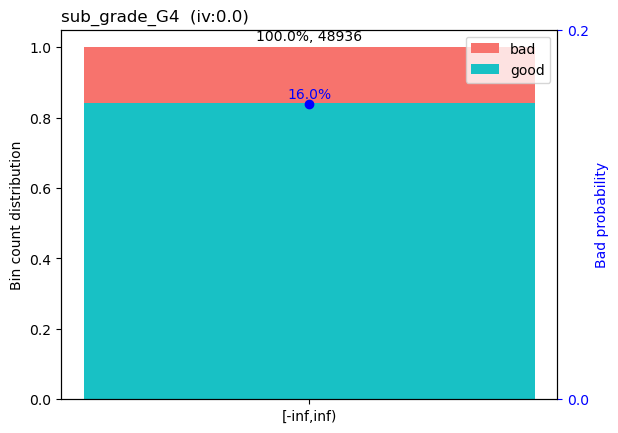

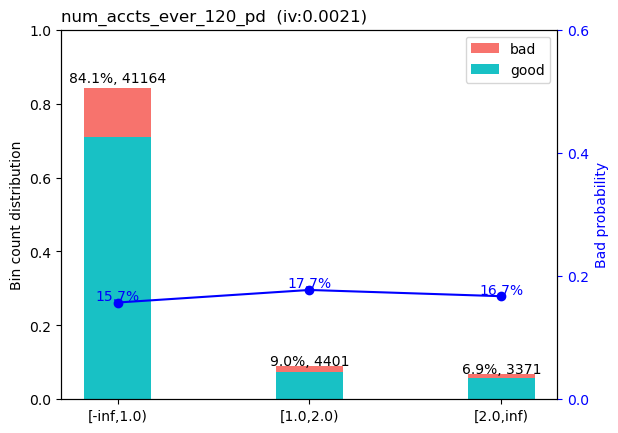

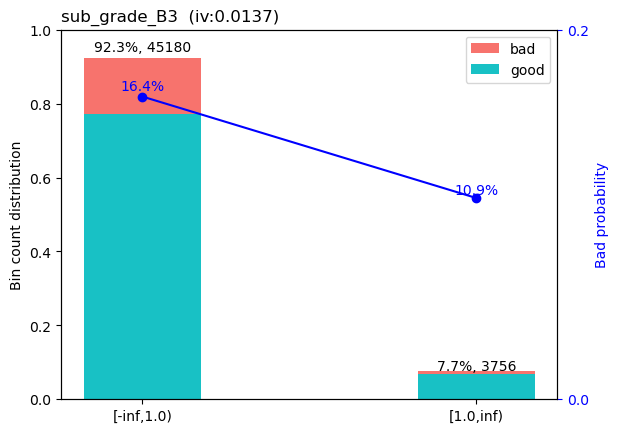

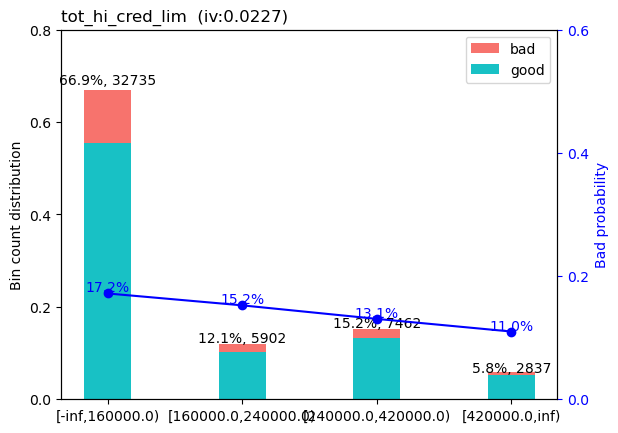

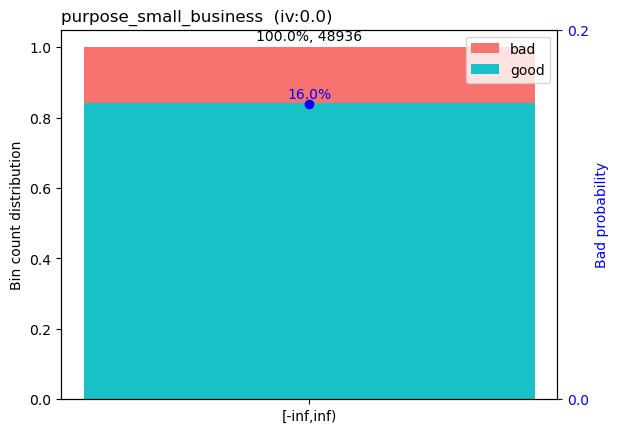

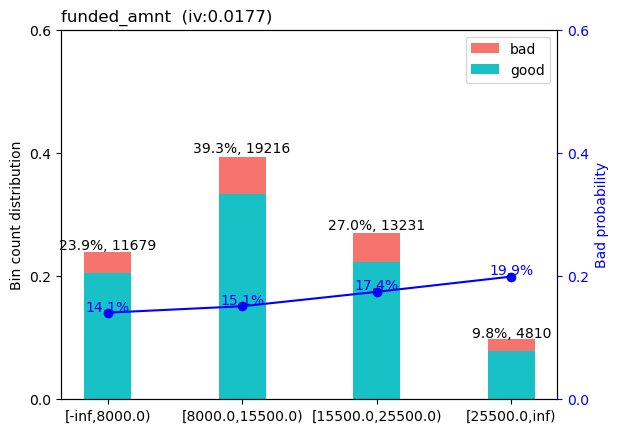

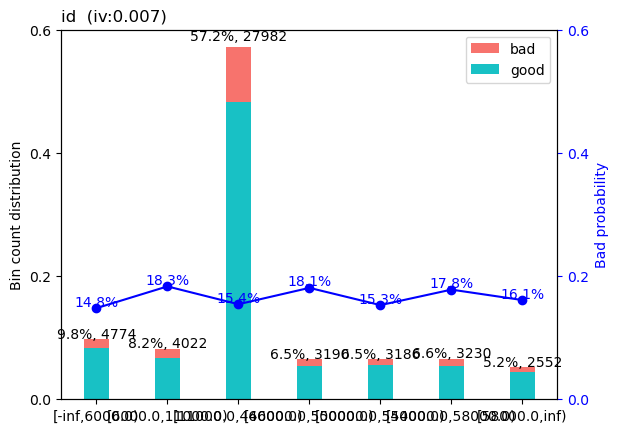

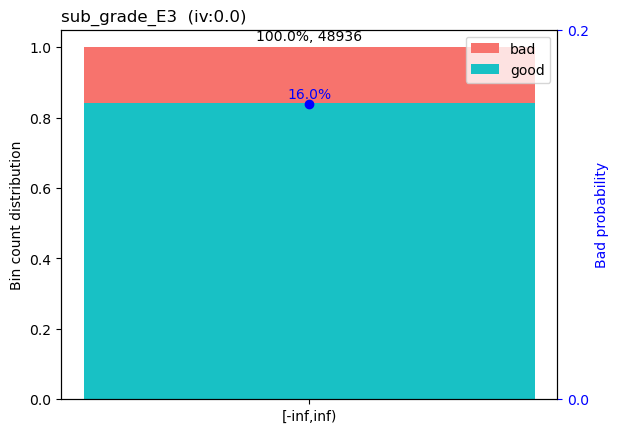

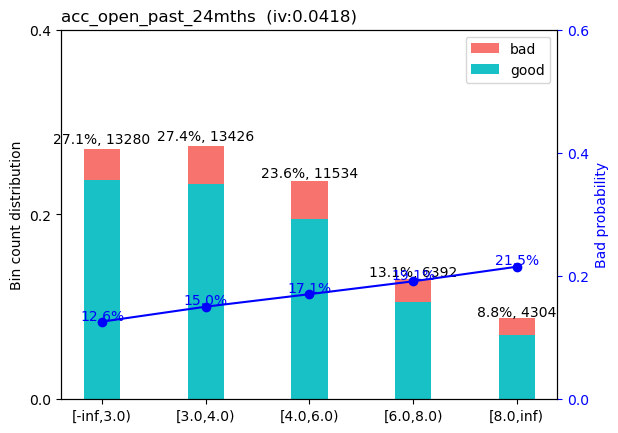

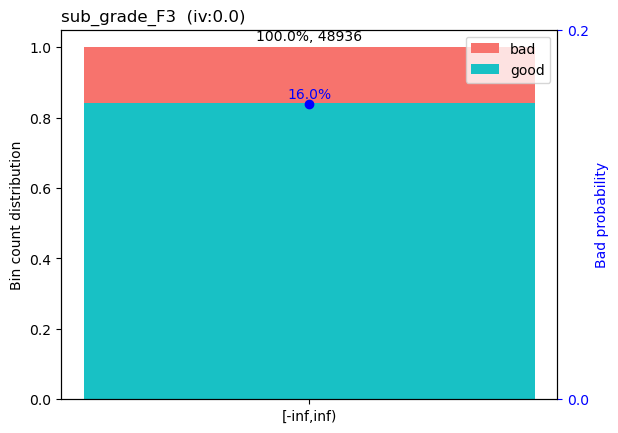

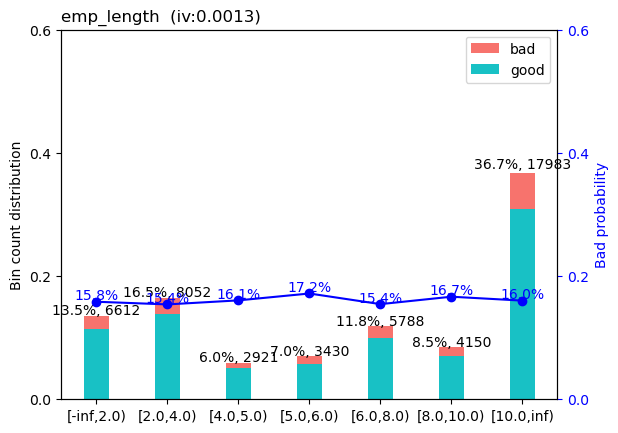

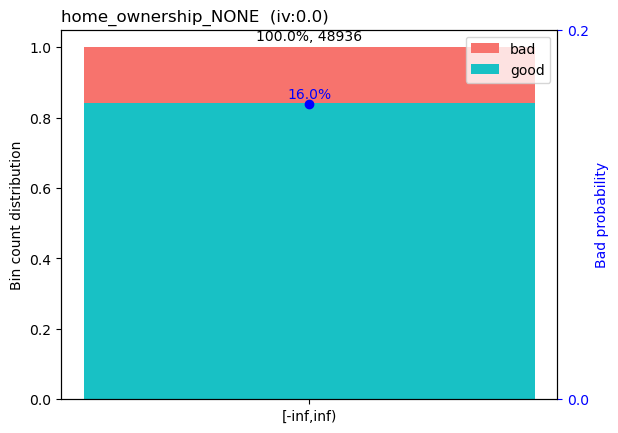

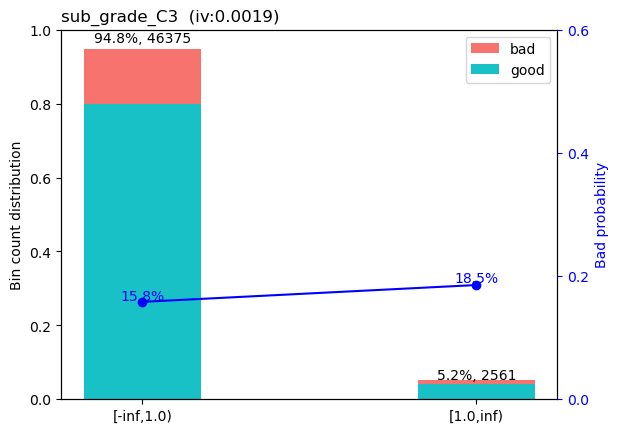

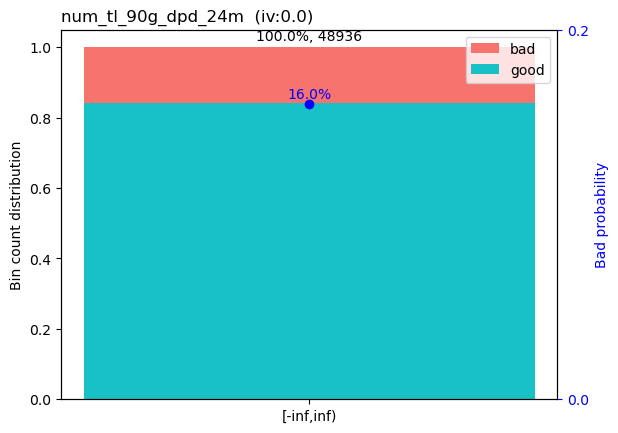

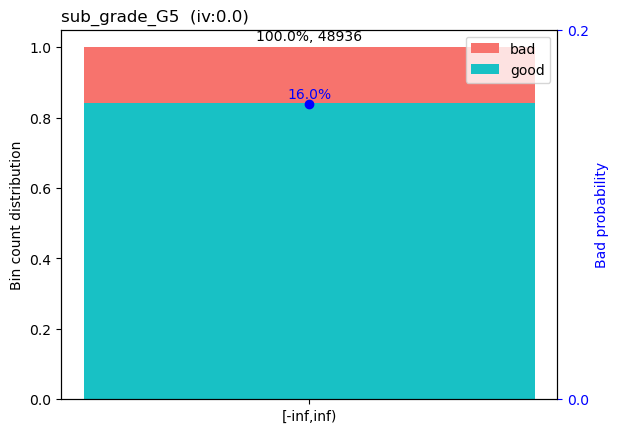

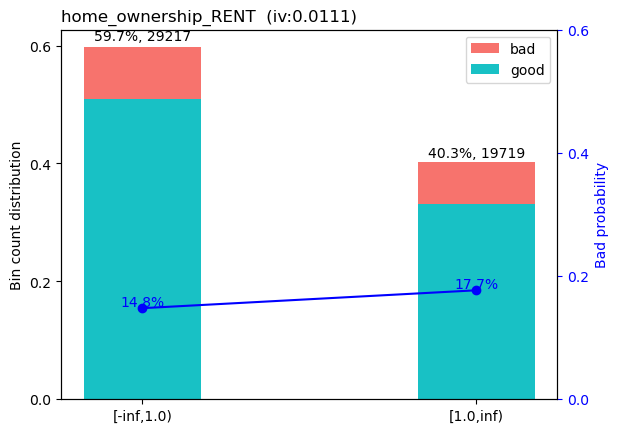

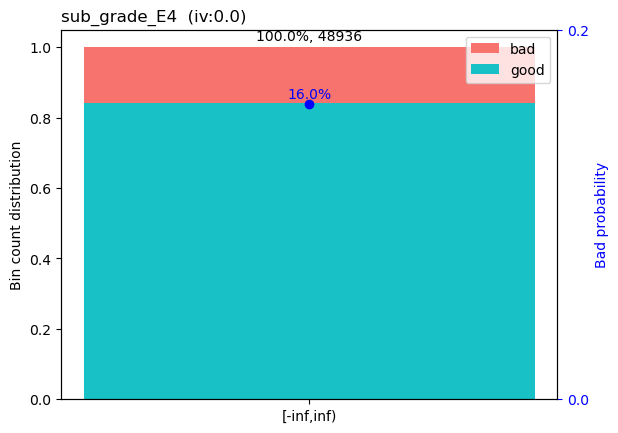

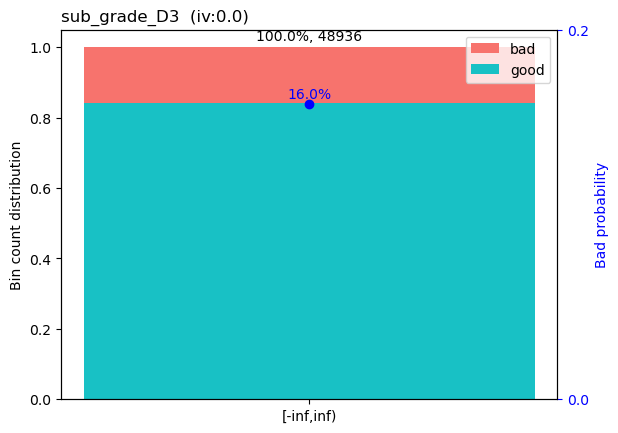

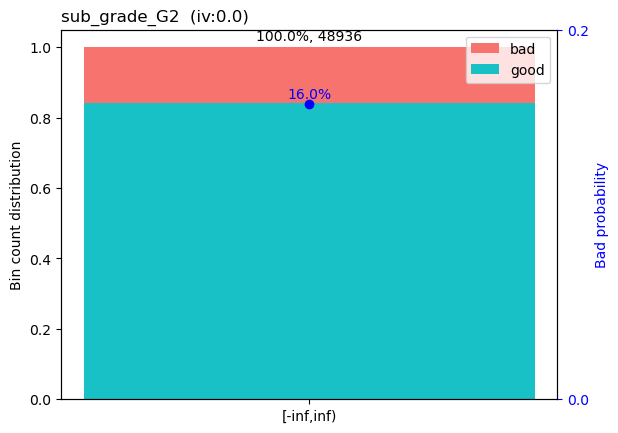

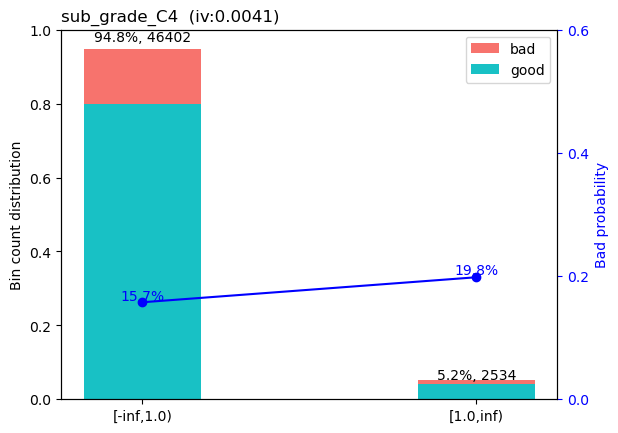

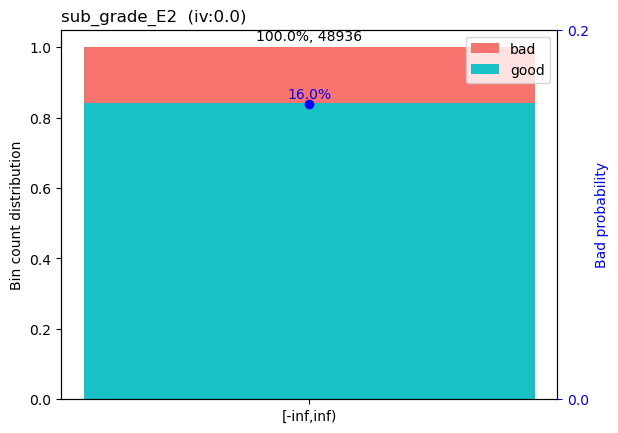

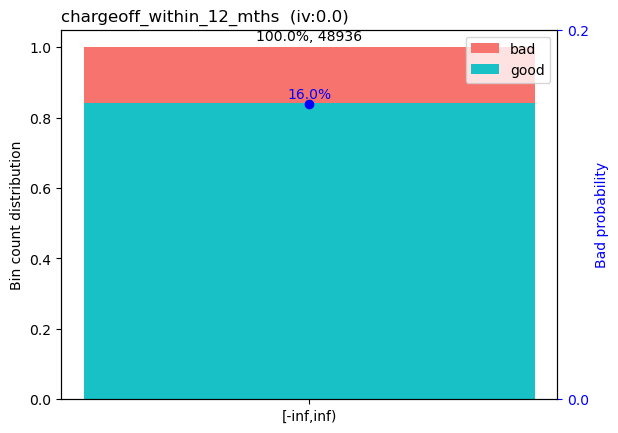

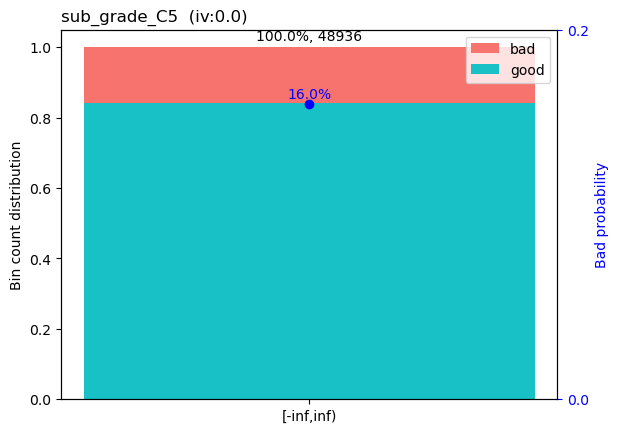

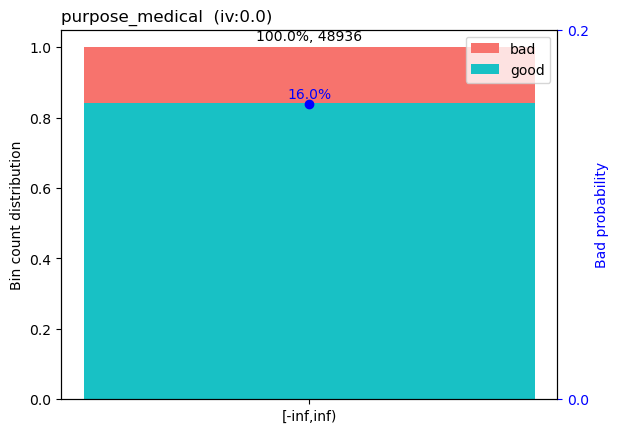

In [31]:
bins = sc.woebin(train_m, y='def', positive = 'bad|1')
sc.woebin_plot(bins)

In [33]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train_m, bins)
test_woe = sc.woebin_ply(train_m, bins)
train_woe.stb.missing()

[INFO] converting into woe values ...
Woe transformating on 48936 rows and 66 columns in 00:00:13
[INFO] converting into woe values ...


missing  total  percent
def                             0  48936   0.0000
avg_cur_bal_woe                 0  48936   0.0000
sub_grade_F1_woe                0  48936   0.0000
sub_grade_F2_woe                0  48936   0.0000
sub_grade_D1_woe                0  48936   0.0000
...                           ...    ...      ...
home_ownership_OTHER_woe        0  48936   0.0000
sub_grade_F3_woe                0  48936   0.0000
emp_length_woe                  0  48936   0.0000
sub_grade_A3_woe                0  48936   0.0000
purpose_medical_woe             0  48936   0.0000

[67 rows x 3 columns]

In [35]:
# This function calculates information value (IV) for multiple x variables
iv = sc.iv(train_woe, y = 'def')
iv.head(10)
## so we can drop all features with IV < 0.02 

variable  info_value
35                  term_woe      0.1541
60  acc_open_past_24mths_woe      0.0418
57                   dti_woe      0.0400
1             annual_inc_woe      0.0379
16           avg_cur_bal_woe      0.0316
7         inq_last_6mths_woe      0.0278
9           sub_grade_B2_woe      0.0227
5        tot_hi_cred_lim_woe      0.0227
40          sub_grade_B1_woe      0.0217
30           funded_amnt_woe      0.0177

In [37]:
train_woe = sc.var_filter(train_woe, y = 'def')
train_woe.head()

[INFO] filtering variables ...


annual_inc_woe  tot_hi_cred_lim_woe  inq_last_6mths_woe  sub_grade_B2_woe  avg_cur_bal_woe  term_woe  sub_grade_B1_woe  dti_woe  acc_open_past_24mths_woe  def
0          0.0783               0.0883             -0.1635            0.0341           0.0900   -0.2700            0.0306  -0.3409                   -0.0710    0
2         -0.2124               0.0883              0.1653            0.0341           0.0900   -0.2700            0.0306   0.0633                   -0.0710    0
4          0.0783               0.0883             -0.1635            0.0341           0.0900   -0.2700            0.0306  -0.3409                   -0.0710    0
5         -0.2124               0.0883             -0.1635            0.0341           0.0900   -0.2700            0.0306   0.0633                   -0.0710    0
6         -0.4330               0.0883              0.0922            0.0341           0.0900   -0.2700            0.0306  -0.1027                   -0.0710    0

In [38]:
test_woe = test_woe[train_woe.columns]
test_woe.head()

annual_inc_woe  tot_hi_cred_lim_woe  inq_last_6mths_woe  sub_grade_B2_woe  avg_cur_bal_woe  term_woe  sub_grade_B1_woe  dti_woe  acc_open_past_24mths_woe  def
1          -0.0596               0.0917             -0.1877            0.0289           0.0841   -0.2915            0.0000  -0.1241                   -0.0489    0
3          -0.0596               0.0917              0.2767            0.0289           0.0841   -0.2915            0.0000   0.1396                   -0.0489    0
10          0.1528               0.0917             -0.1877            0.0289           0.0841   -0.2915            0.0000   0.1396                   -0.0489    0
20          0.1528               0.0917             -0.1877            0.0289           0.0841   -0.2915            0.0000   0.1396                   -0.0489    1
33         -0.0596               0.0917             -0.1877            0.0289           0.0841   -0.2915            0.0000   0.1396                   -0.0489    0

## Correlation matrix
#### Correlated features removal (correlation matrix, VIF)

In [41]:
cor = train_woe.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm') 

'Avg_cur_bal' and 'tot_hi_cred_lim' are correlated, so they are too close to each over.

Let's try to built logreg without one of them. Choose feature with the highest corr with target.

From corr matrix we see that they don't have enough relationship with 'def'. It's strange. 
Prefer to delete 'tot_hi_cred_lim_woe'.

In [65]:
train_woe['def'].corr(train_woe['tot_hi_cred_lim_woe'])

0.052984977810734815

In [67]:
train_woe['def'].corr(train_woe['avg_cur_bal_woe'])

0.05993432190284059

In [43]:
del train_woe['tot_hi_cred_lim_woe']
del test_woe['tot_hi_cred_lim_woe']

In [90]:
train_woe.head()

acc_open_past_24mths_woe  dti_woe  term_woe  annual_inc_woe  sub_grade_B2_woe  sub_grade_B1_woe  inq_last_6mths_woe  avg_cur_bal_woe  def
0                   -0.0710  -0.3409   -0.2700          0.0783            0.0341            0.0306             -0.1635           0.0900    0
2                   -0.0710   0.0633   -0.2700         -0.2124            0.0341            0.0306              0.1653           0.0900    0
4                   -0.0710  -0.3409   -0.2700          0.0783            0.0341            0.0306             -0.1635           0.0900    0
5                   -0.0710   0.0633   -0.2700         -0.2124            0.0341            0.0306             -0.1635           0.0900    0
6                   -0.0710  -0.1027   -0.2700         -0.4330            0.0341            0.0306              0.0922           0.0900    0

In [45]:
test_woe = test_woe[train_woe.columns]
test_woe.head()

annual_inc_woe  inq_last_6mths_woe  sub_grade_B2_woe  avg_cur_bal_woe  term_woe  sub_grade_B1_woe  dti_woe  acc_open_past_24mths_woe  def
1          -0.0596             -0.1877            0.0289           0.0841   -0.2915            0.0000  -0.1241                   -0.0489    0
3          -0.0596              0.2767            0.0289           0.0841   -0.2915            0.0000   0.1396                   -0.0489    0
10          0.1528             -0.1877            0.0289           0.0841   -0.2915            0.0000   0.1396                   -0.0489    0
20          0.1528             -0.1877            0.0289           0.0841   -0.2915            0.0000   0.1396                   -0.0489    1
33         -0.0596             -0.1877            0.0289           0.0841   -0.2915            0.0000   0.1396                   -0.0489    0

# Models

#### Standardization (is not needed here as WOE)

scaler = StandardScaler()

train_woe = pd.DataFrame(scaler.fit_transform(train_woe), columns=train_woe.columns)
test_woe = pd.DataFrame(scaler.fit_transform(test_woe), columns=test_woe.columns)

train_woe.head()

In [47]:
y_train = train_woe.loc[:,'def']
X_train = train_woe.loc[:,train_woe.columns != 'def']
y_test = test_woe.loc[:,'def']
X_test = test_woe.loc[:,test_woe.columns != 'def']

### Metrics preparing for CV

In [49]:
def results(y_test, y_pred, time = 0):
    report = metrics.classification_report(y_test, y_pred, target_names=['no_def', 'def'])
    print(report)

    print('\nArea under the ROC curve - ' + str(round(metrics.roc_auc_score(y_test, y_pred), 4)))
    if time != 0:
        print('\nTime - ' + str(round(time, 4)) + ' sec')

def ROC_curve(y_test, model):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(6, 5))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()


def ROC_curve_all(y_test, y_pred):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(6, 5))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()

## All models

In [51]:
from sklearn.metrics import make_scorer
from sklearn import metrics

roc_auc_scorer = make_scorer(metrics.roc_auc_score, greater_is_better=True,
                             needs_threshold=True)
#!pip install lightgbm
from xgboost import XGBClassifier, XGBRegressor
import lightgbm as lgb

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBoost, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [53]:
from time import process_time
start_time = process_time()

logreg = LogisticRegression(random_state=0, C = 0.1, penalty = 'l2', solver = "saga")
logreg.fit(X_train, y_train)

tree = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_leaf=5)
tree.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators= 250, max_depth=None, random_state=11, criterion='entropy')
rf.fit(X_train, y_train)

GB = GBoost(loss = 'exponential', max_depth=3, n_estimators=100, )
GB.fit(X_train, y_train)

nn = MLPClassifier(activation='logistic',solver = 'adam',
                      hidden_layer_sizes=(100, 100))
nn.fit(X_train, y_train)

finish_time = process_time()
sec = finish_time - start_time

print(round(sec, 4))

15.9844


In [55]:
import seaborn as sns
models = [logreg, tree, rf, GB, nn]
test_list = []
to_pred_list = []

for model in models:
  test_list.append(metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

names =  ['log_reg', 'tree', 'rf', 'GB', 'nn']
print(names)

data = [test_list[i] for i in range(5)]
data = np.array(data).flatten()
print(data)

['log_reg', 'tree', 'rf', 'GB', 'nn']
[0.66563298 0.64474354 0.62466101 0.6613518  0.66554454]


logreg has one the highest ROC_AUC, so I will continue only with this model

## Logistic regression

#### Model parameters' selection

In [57]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'class_weight': ['balanced'],
    'C'      : [0.001,0.01,0.1,1,10,100,1000],
    'penalty': ['l1','l2','elasticnet', 'none']
    }
## tried with 'saga', result is the same with ROC
gr_lr = GridSearchCV(LogisticRegression(solver = 'liblinear', n_jobs=-1, random_state=17), parameters, cv =5, scoring = "roc_auc")
gr_lr.fit(X_train, y_train)

gr_lr.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}

              precision    recall  f1-score   support

      no_def       0.90      0.65      0.75     10281
         def       0.25      0.60      0.35      1952

    accuracy                           0.64     12233
   macro avg       0.57      0.62      0.55     12233
weighted avg       0.79      0.64      0.69     12233


Area under the ROC curve - 0.6248


Area under the ROC curve for probabilities, test sample - 0.6658254732588047


Gini - 0.3316509465176094




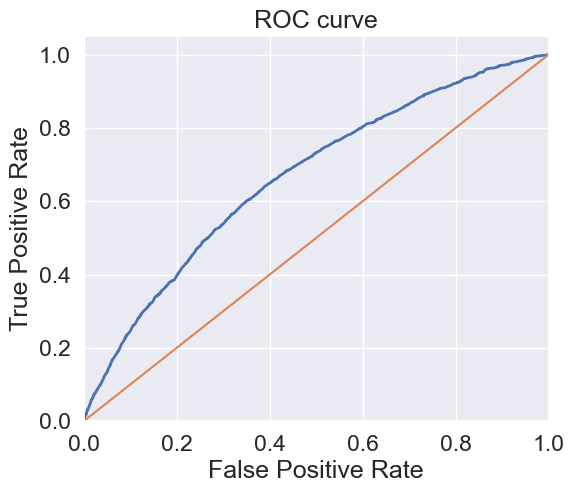

In [65]:
logreg = LogisticRegression(random_state=0, C = 0.1, penalty = 'l2', solver = "liblinear", class_weight='balanced')  ##
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#threshold:
#threshold = 0.4

#probability and class for train
#train_prob = logreg.predict_proba(X_train)[:, 1]
#train_pred = (train_prob >= threshold).astype(int)

#probability and class for test
#test_prob = logreg.predict_proba(X_test)[:, 1]
#test_pred = (test_prob >= threshold).astype(int)

results(y_test, y_pred)
print("\n")
print("Area under the ROC curve for probabilities, test sample - " + str(metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])))
print("\n")
Gini = 2*metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]) -1
print("Gini - " + str(Gini))
print("\n")

ROC_curve(y_test, logreg)


In [67]:
print(logreg.intercept_)
print(logreg.coef_)
X_train.head()

[-0.00172391]
[[1.11485896 0.82620498 0.58772054 0.76014989 1.03983324 0.60013103
  0.48569487 0.80057868]]


annual_inc_woe  inq_last_6mths_woe  sub_grade_B2_woe  avg_cur_bal_woe  term_woe  sub_grade_B1_woe  dti_woe  acc_open_past_24mths_woe
0          0.0783             -0.1635            0.0341           0.0900   -0.2700            0.0306  -0.3409                   -0.0710
2         -0.2124              0.1653            0.0341           0.0900   -0.2700            0.0306   0.0633                   -0.0710
4          0.0783             -0.1635            0.0341           0.0900   -0.2700            0.0306  -0.3409                   -0.0710
5         -0.2124             -0.1635            0.0341           0.0900   -0.2700            0.0306   0.0633                   -0.0710
6         -0.4330              0.0922            0.0341           0.0900   -0.2700            0.0306  -0.1027                   -0.0710

### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='roc_auc')

print("Scores of each fold:", cv_scores)
print("Mean score:", np.mean(cv_scores))

# with cv=100: 0.6610711263459181
# with cv=1000: 0.6620991372158619

In [ ]:
##for test

cv_scores = cross_val_score(logreg, X_test, y_test, cv=10, scoring='roc_auc')

print("Scores of each fold:", cv_scores)
print("Mean score:", np.mean(cv_scores))

### Probabilities

In [69]:
train_prob = logreg.predict_proba(X_train)[:, 1]
test_prob=logreg.predict_proba(X_test)[:, 1]
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

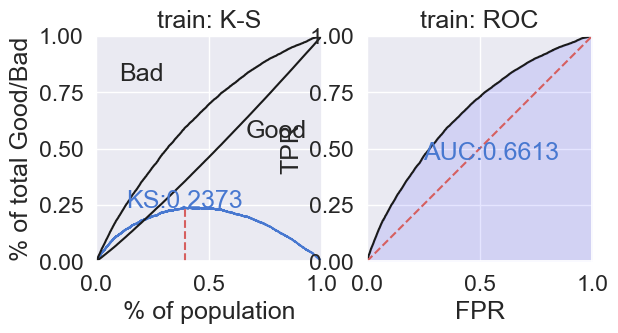

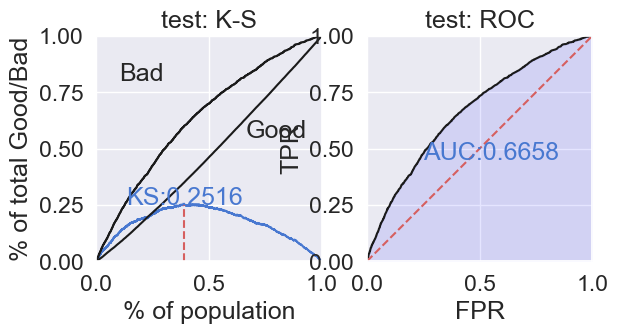

In [71]:
# performance ks & roc 
train_perf = sc.perf_eva(y_train, train_prob, title = "train")
test_perf = sc.perf_eva(y_test, test_prob, title = "test")

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve

print('Accuracy')
print(accuracy_score(y_test, test_pred))
print('AUC Score')
print(roc_auc_score(y_test, test_pred))

Accuracy
0.6428513038502411
AUC Score
0.6248295837778107


In [77]:
print(classification_report(y_test, np.array(test_pred)))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75     10281
           1       0.25      0.60      0.35      1952

    accuracy                           0.64     12233
   macro avg       0.57      0.62      0.55     12233
weighted avg       0.79      0.64      0.69     12233



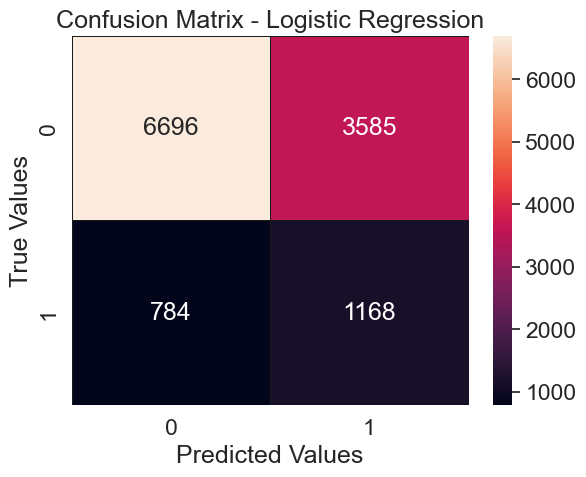

In [79]:
conf_log2 = confusion_matrix(y_test,test_pred)
sb.heatmap(data=conf_log2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix - Logistic Regression');

### Real data

In [81]:
df_real = pd.read_csv('new_clients_for_scoring.csv')
df_r = pd.DataFrame(df_real)
df_r.term.unique()

array([36, 60], dtype=int64)

In [83]:
df_r.stb.missing()

missing  total  percent
mths_since_recent_inq        5989  60333   9.9266
emp_title                    3146  60333   5.2144
emp_length                   3135  60333   5.1962
client_id                       0  60333   0.0000
inq_last_6mths                  0  60333   0.0000
tot_hi_cred_lim                 0  60333   0.0000
avg_cur_bal                     0  60333   0.0000
acc_open_past_24mths            0  60333   0.0000
num_tl_90g_dpd_24m              0  60333   0.0000
num_accts_ever_120_pd           0  60333   0.0000
chargeoff_within_12_mths        0  60333   0.0000
delinq_2yrs                     0  60333   0.0000
term                            0  60333   0.0000
issue_d                         0  60333   0.0000
annual_inc                      0  60333   0.0000
funded_amnt                     0  60333   0.0000
dti                             0  60333   0.0000
home_ownership                  0  60333   0.0000
sub_grade                       0  60333   0.0000
addr_state                      0  60333   0.0000
purpose                         0  60333   0.0000
delinq_amnt                     0  60333   0.0000

As in my total model log reg I didn't use 'mths_since_recent_inq', 'emp_title', 'emp_length', so I can drop them now

#### Data preparation

In [85]:
del df_r['mths_since_recent_inq']
del df_r['emp_title']
del df_r['emp_length']
del df_r['issue_d']
del df_r['purpose']
del df_r['addr_state']
del df_r['home_ownership']

In [87]:
df_r = pd.get_dummies(df_r, drop_first=True)
print("Columns: {}".format(df_r.shape[1]))
df_r.head()

Columns: 48


client_id     dti  funded_amnt   annual_inc  term  inq_last_6mths  delinq_2yrs  chargeoff_within_12_mths  num_accts_ever_120_pd  num_tl_90g_dpd_24m  acc_open_past_24mths  avg_cur_bal  tot_hi_cred_lim  delinq_amnt  sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  \
0          0 26.7200        15000  45,000.0000    36               0            0                         0                      0                   0                     4         7245            56948            0         False         False         False          True         False         False         False   
1          1 12.6200        31500 200,000.0000    60               2            1                         0                      0                   0                     4        54598           641658            0         False         False         False         False         False         False         False   
2          2 27.7200         6400  46,500.0000    36               0            0                         0                      0                   0                     3         8376           120218            0         False         False          True         False         False         False         False   
3          3 25.6800        15000  68,700.0000    36               0            2                         0                      2                   1                     3         5028            70899            0         False         False         False         False         False         False         False   
4          4  6.8000         3000 114,435.0000    36               0            0                         0                      0                   0                     2        28455           281150            0         False         False         False         False         False         False         False   

   sub_grade_B4  sub_grade_B5  sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  sub_grade_C5  sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  sub_grade_D5  sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  sub_grade_E5  sub_grade_F1  sub_grade_F2  sub_grade_F3  sub_grade_F4  sub_grade_F5  \
0         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False   
1         False         False         False         False         False          True         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False   
2         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False   
3         False         False         False         False         False         False         False         False         False          True         False         False         False         False         False         False         False         False         False         False         False         False   
4         False         False         False          True         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False         False   

   sub_grade_G1  sub_grade_G2  sub_grade_G3  sub_grade_G4  sub_grade_G5  
0         False         False         False         False         False  
1         False         False         False         False         False  

#### WOE

[INFO] converting into woe values ...
Woe transformating on 60333 rows and 47 columns in 00:00:13


missing  total  percent
sub_grade_A4_woe                    0  60333   0.0000
avg_cur_bal_woe                     0  60333   0.0000
sub_grade_D1_woe                    0  60333   0.0000
num_tl_90g_dpd_24m_woe              0  60333   0.0000
sub_grade_G5_woe                    0  60333   0.0000
delinq_2yrs_woe                     0  60333   0.0000
sub_grade_B4_woe                    0  60333   0.0000
sub_grade_E4_woe                    0  60333   0.0000
sub_grade_B2_woe                    0  60333   0.0000
sub_grade_D3_woe                    0  60333   0.0000
sub_grade_G2_woe                    0  60333   0.0000
sub_grade_C4_woe                    0  60333   0.0000
sub_grade_F1_woe                    0  60333   0.0000
sub_grade_E2_woe                    0  60333   0.0000
dti_woe                             0  60333   0.0000
sub_grade_E5_woe                    0  60333   0.0000
chargeoff_within_12_mths_woe        0  60333   0.0000
sub_grade_B1_woe                    0  60333   0.0000
sub_grade_G3_woe                    0  60333   0.0000
sub_grade_C5_woe                    0  60333   0.0000
sub_grade_D5_woe                    0  60333   0.0000
sub_grade_C1_woe                    0  60333   0.0000
sub_grade_F2_woe                    0  60333   0.0000
sub_grade_C3_woe                    0  60333   0.0000
sub_grade_A2_woe                    0  60333   0.0000
sub_grade_B3_woe                    0  60333   0.0000
sub_grade_F5_woe                    0  60333   0.0000
sub_grade_D4_woe                    0  60333   0.0000
delinq_amnt_woe                     0  60333   0.0000
sub_grade_D2_woe                    0  60333   0.0000
annual_inc_woe                      0  60333   0.0000
sub_grade_E1_woe                    0  60333   0.0000
sub_grade_G4_woe                    0  60333   0.0000
sub_grade_G1_woe                    0  60333   0.0000
num_accts_ever_120_pd_woe           0  60333   0.0000
sub_grade_C2_woe                    0  60333   0.0000
sub_grade_B5_woe                    0  60333   0.0000
sub_grade_F4_woe                    0  60333   0.0000
tot_hi_cred_lim_woe                 0  60333   0.0000
funded_amnt_woe                     0  60333   0.0000
term_woe                            0  60333   0.0000
sub_grade_E3_woe                    0  60333   0.0000
acc_open_past_24mths_woe            0  60333   0.0000
sub_grade_F3_woe                    0  60333   0.0000
sub_grade_A3_woe                    0  60333   0.0000
inq_last_6mths_woe                  0  60333   0.0000
sub_grade_A5_woe                    0  60333   0.0000

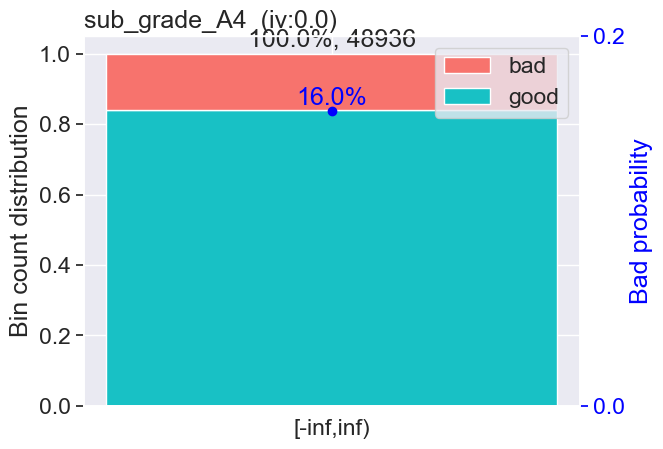

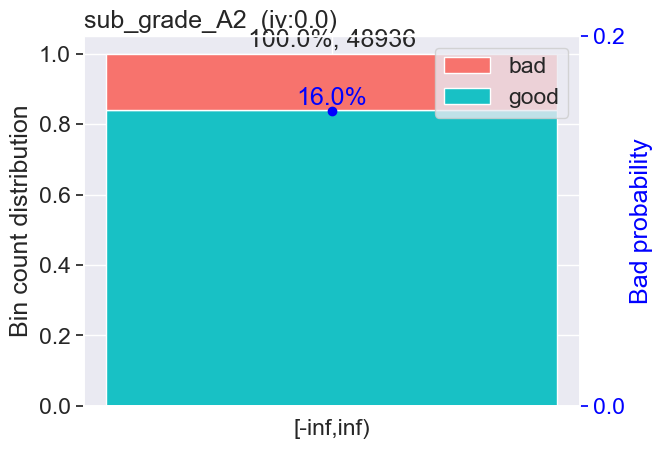

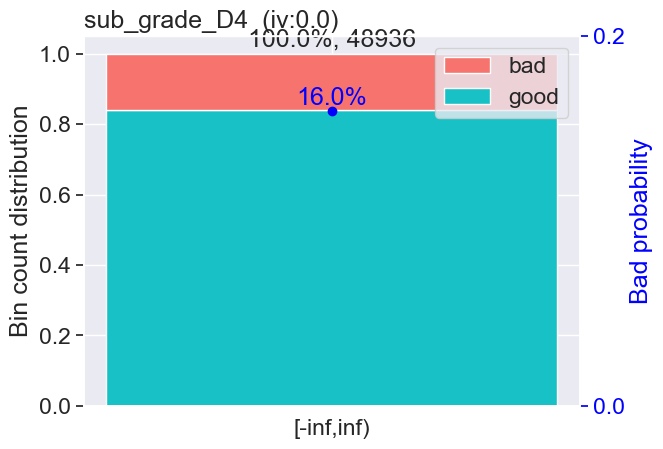

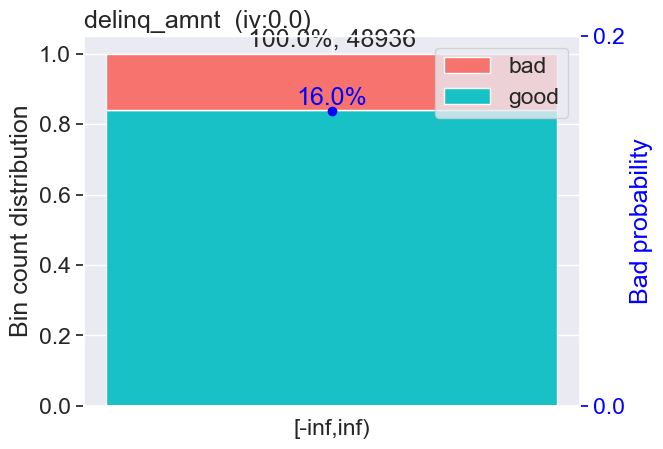

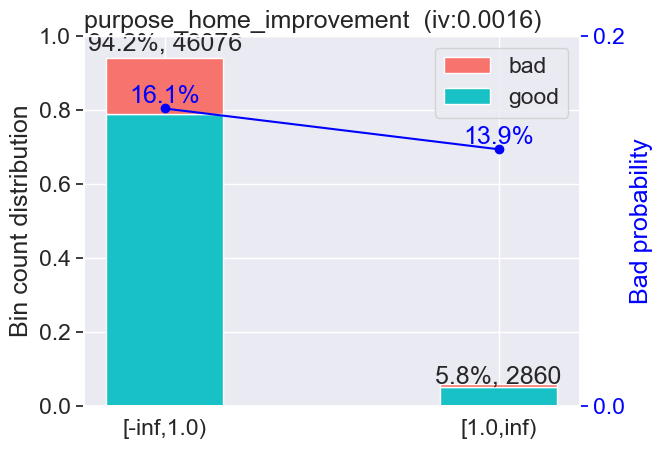

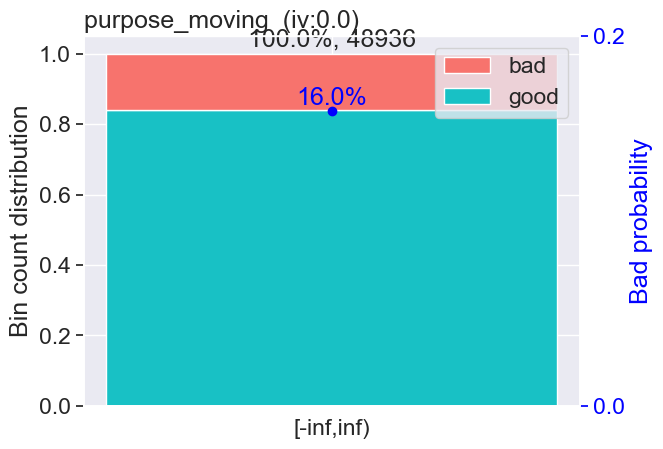

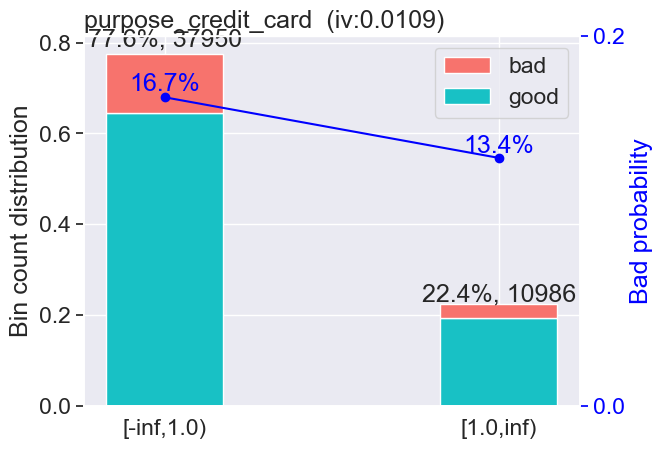

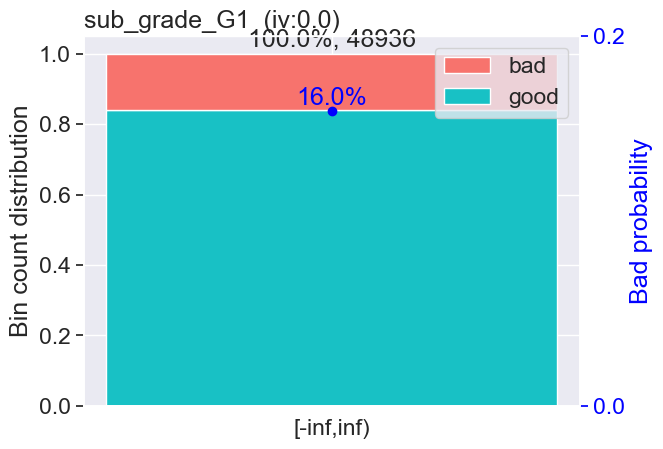

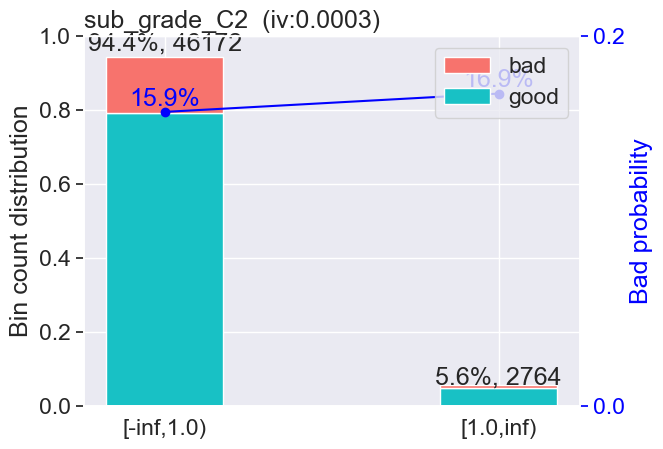

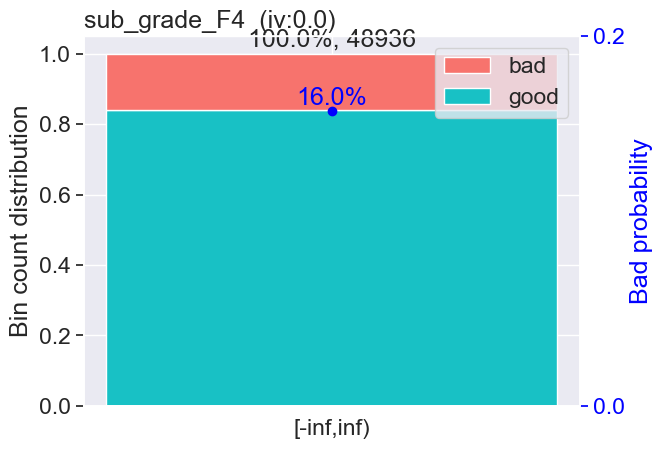

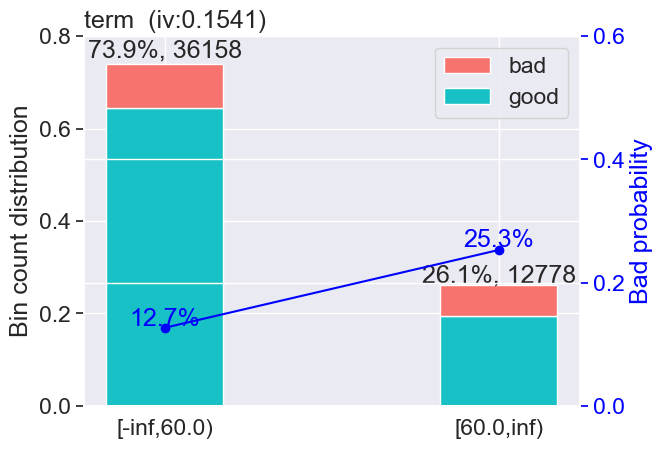

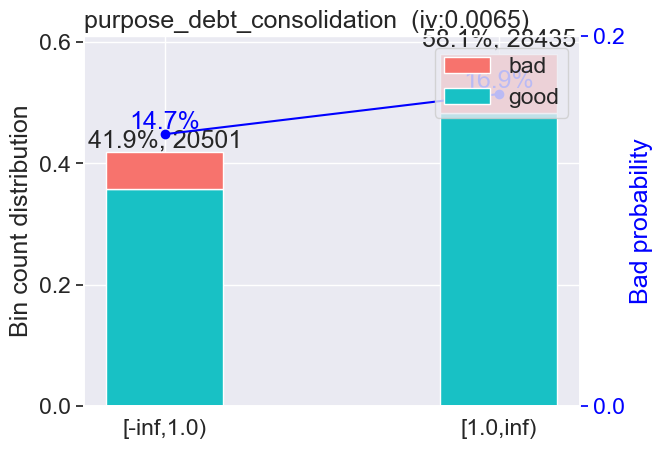

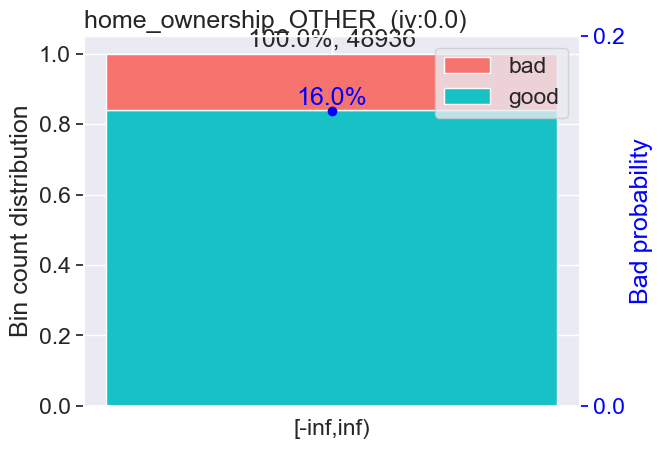

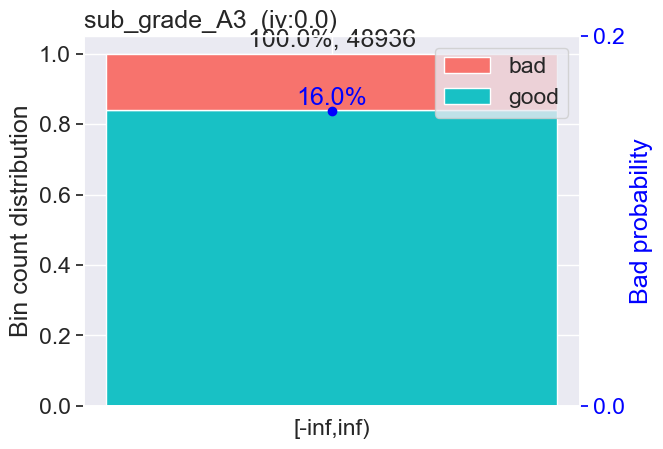

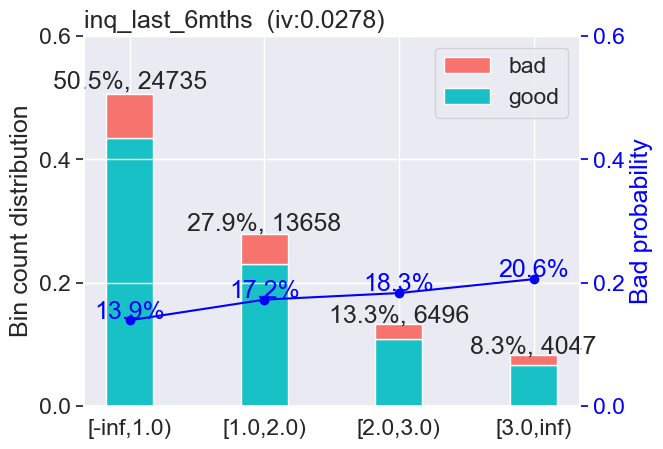

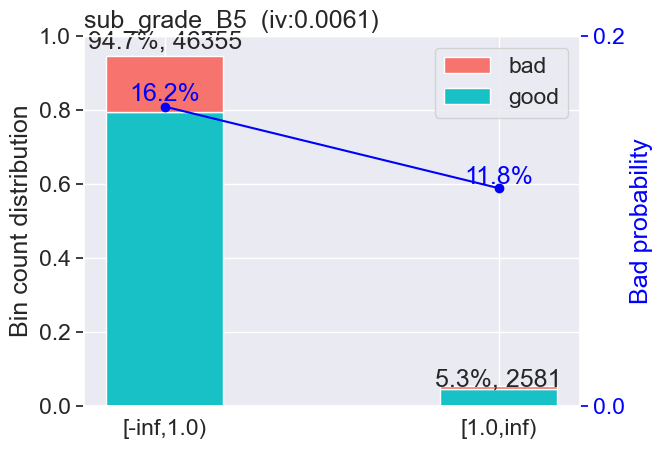

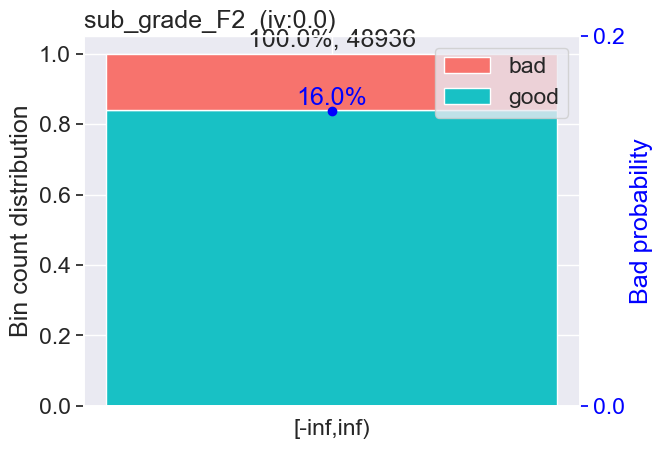

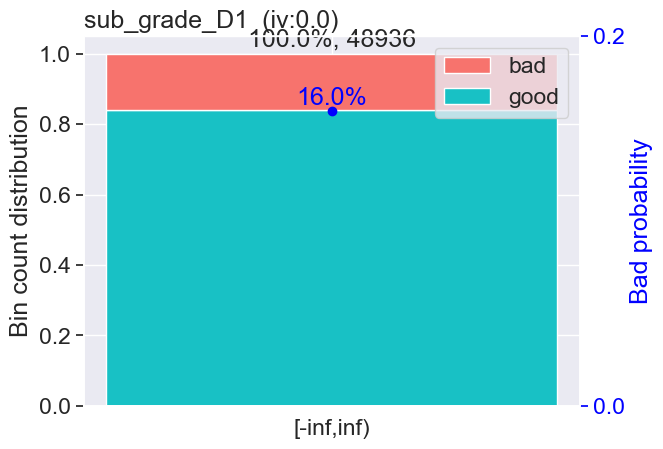

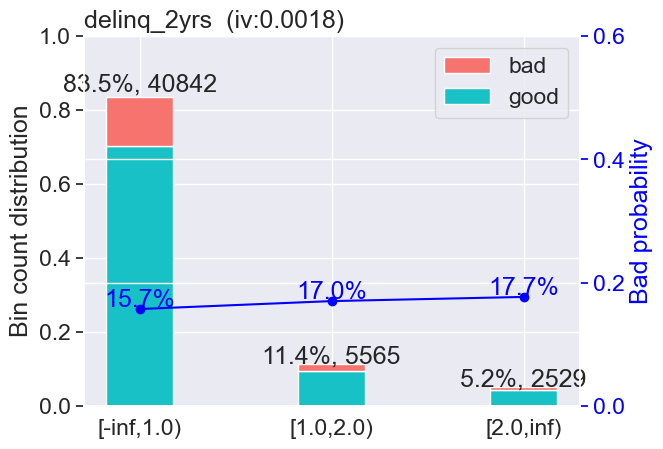

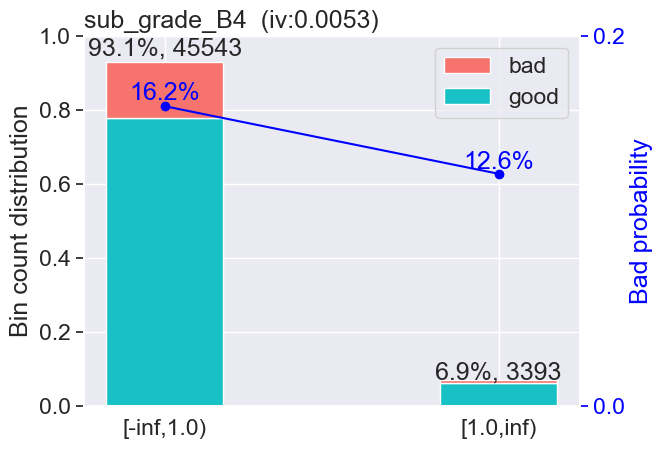

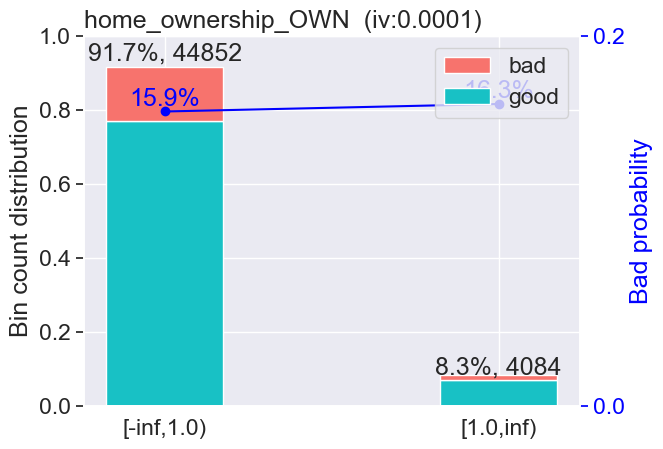

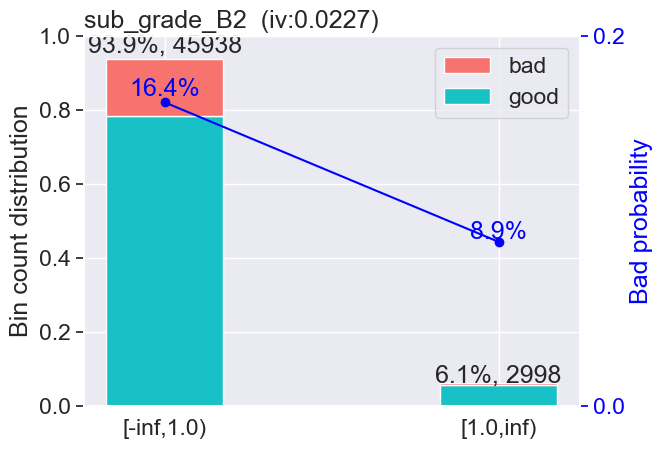

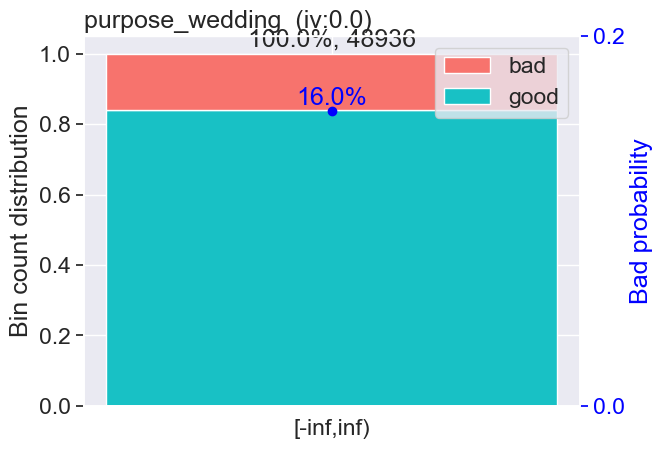

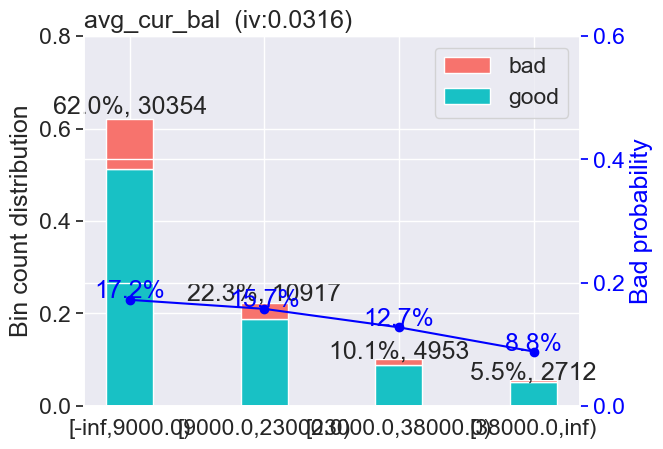

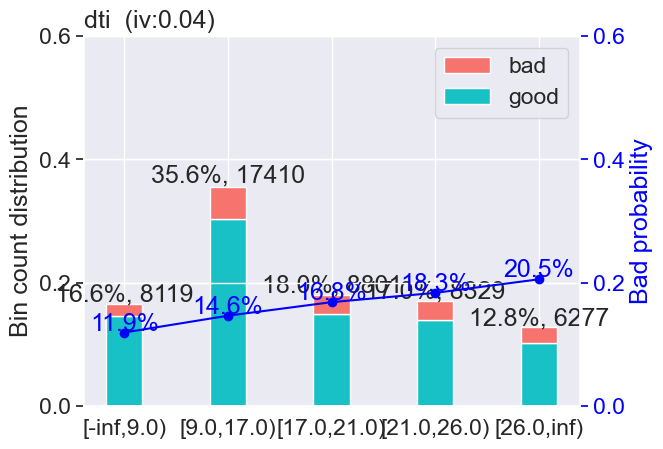

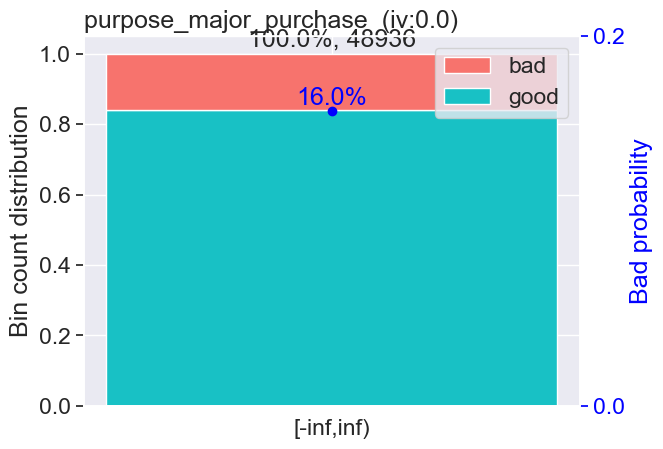

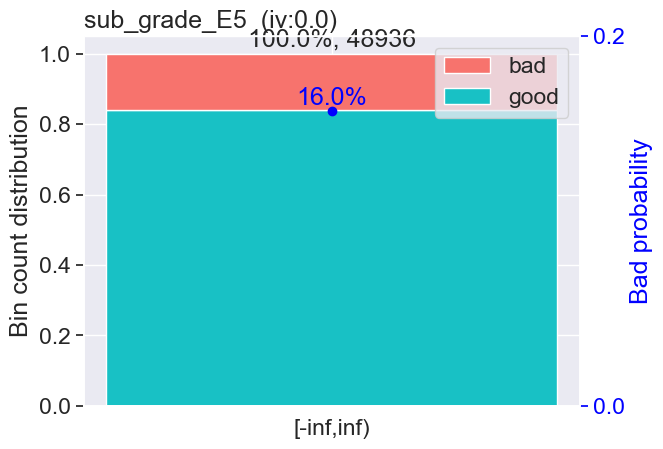

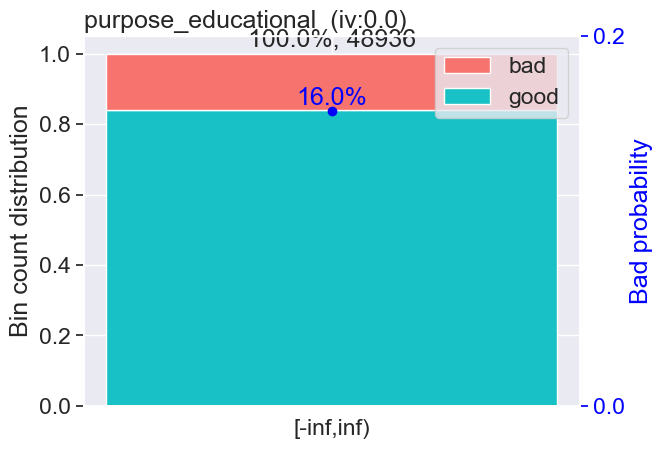

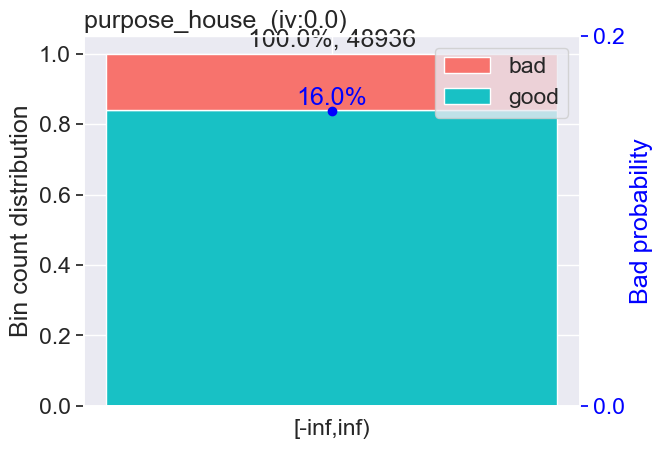

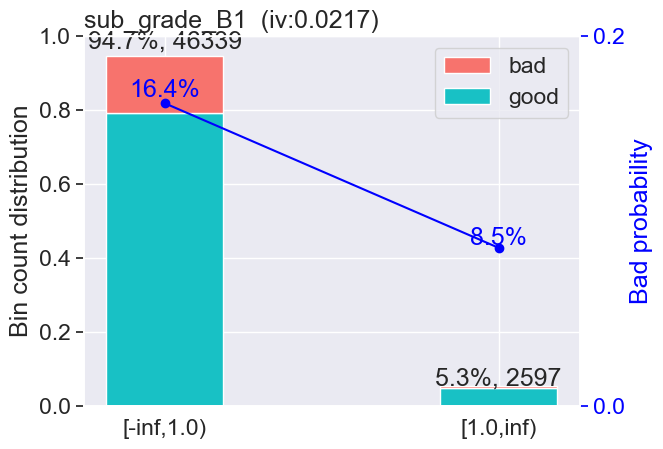

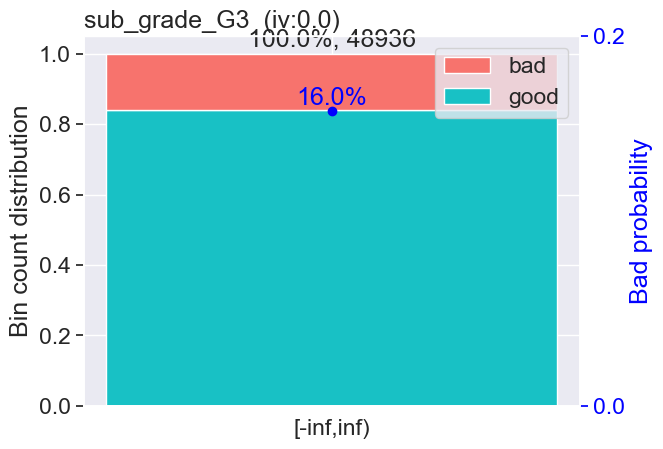

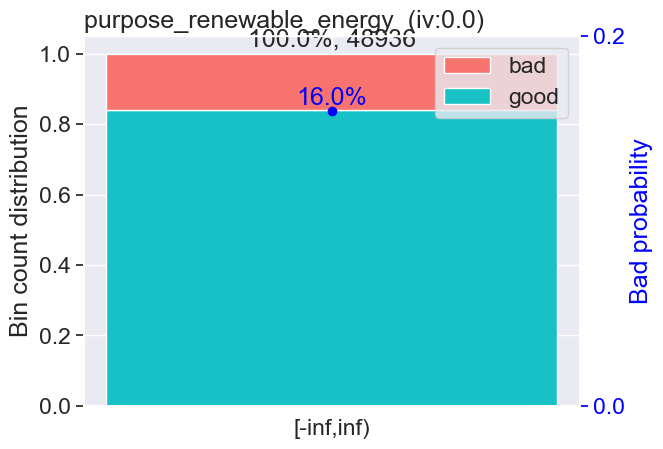

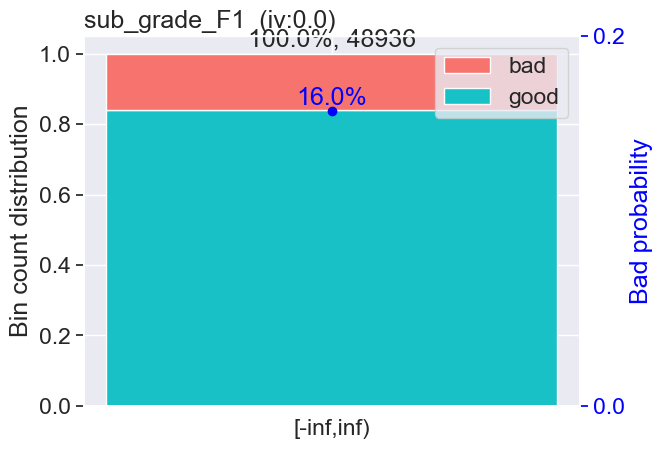

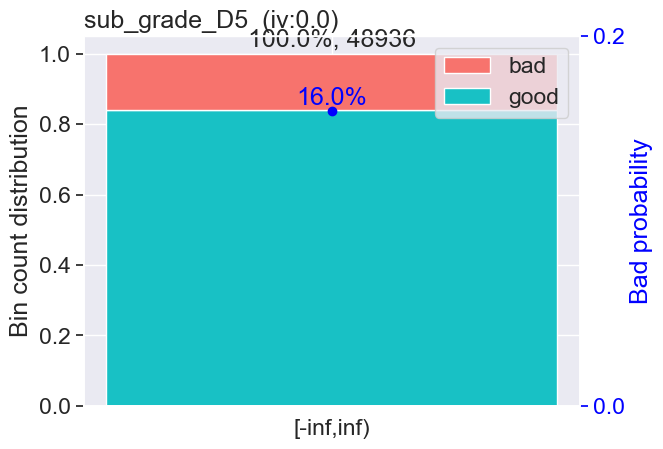

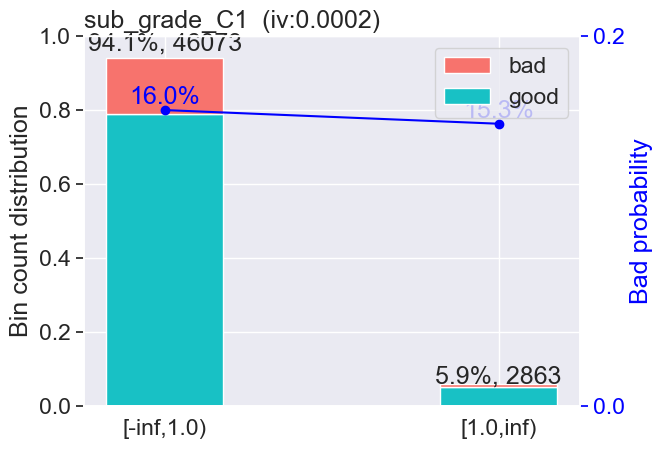

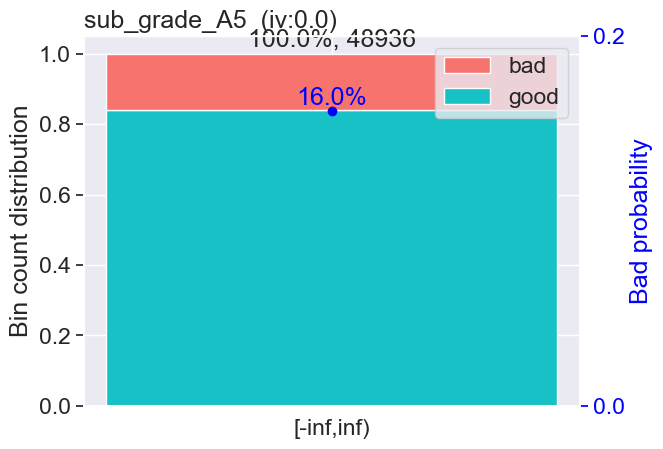

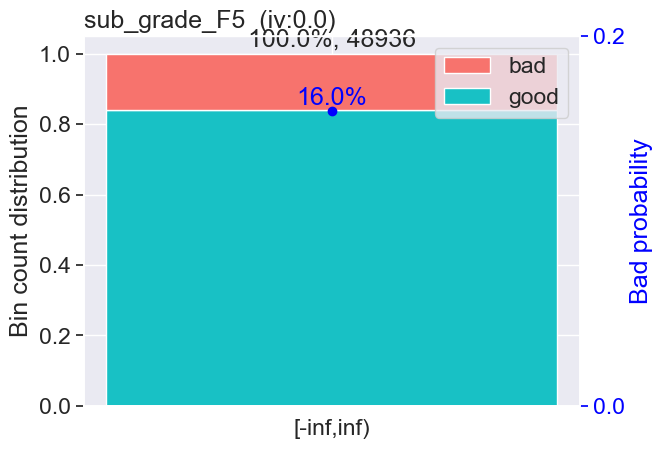

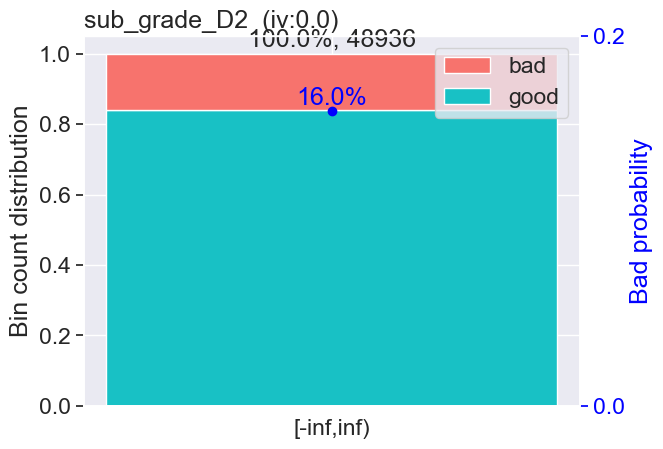

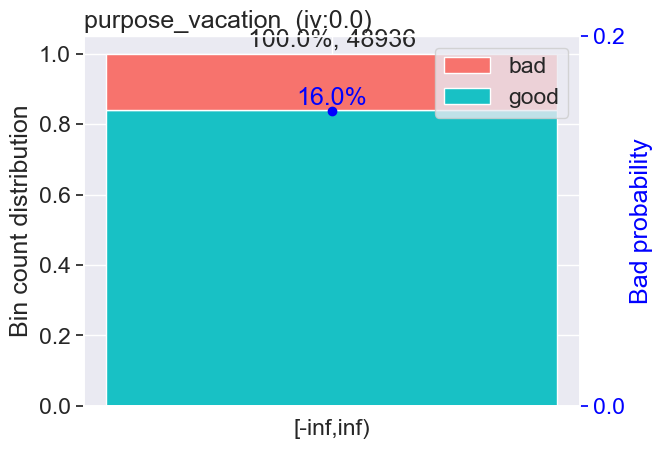

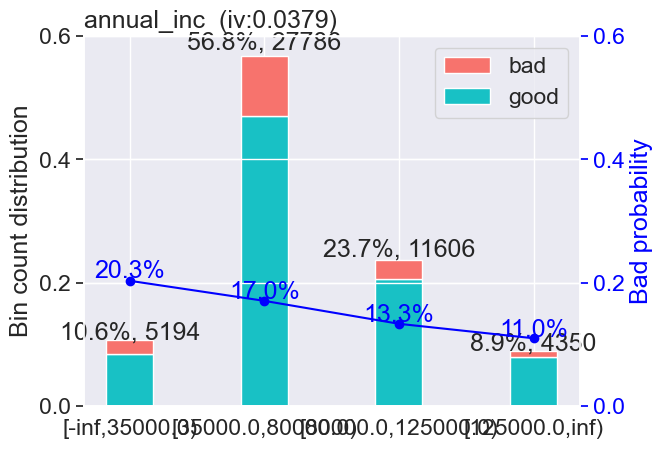

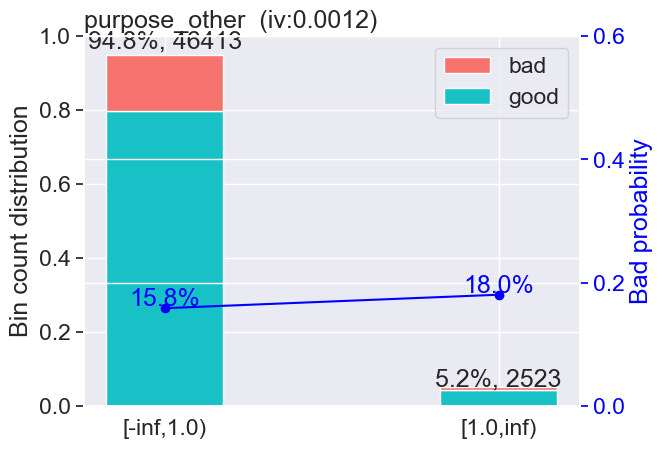

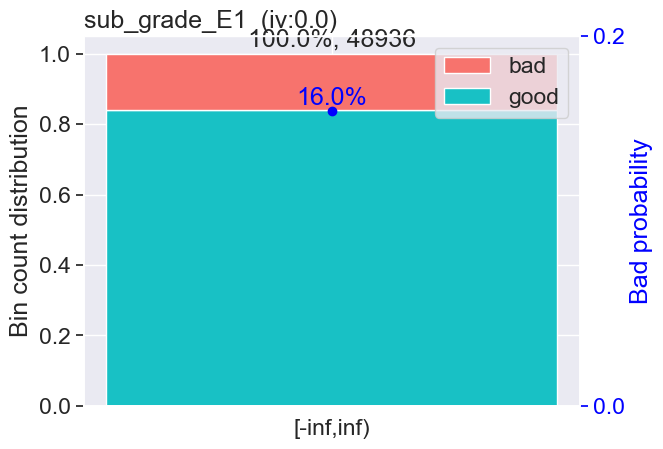

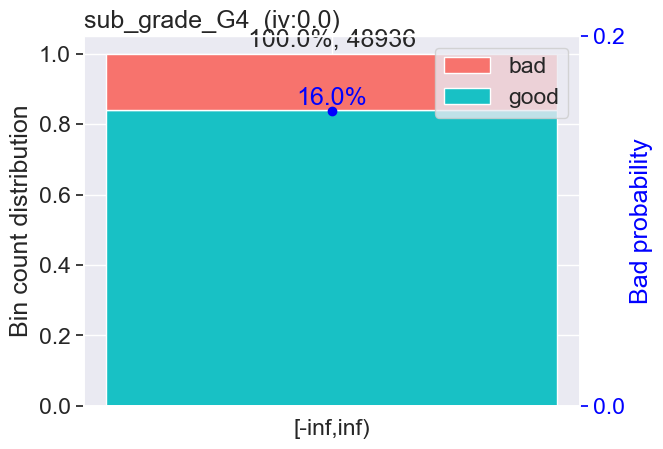

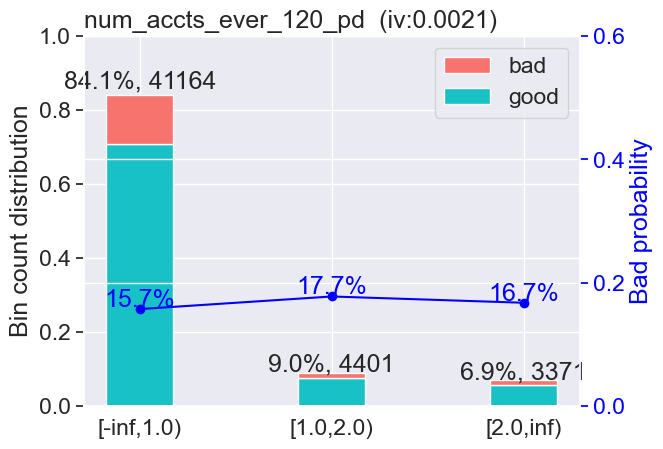

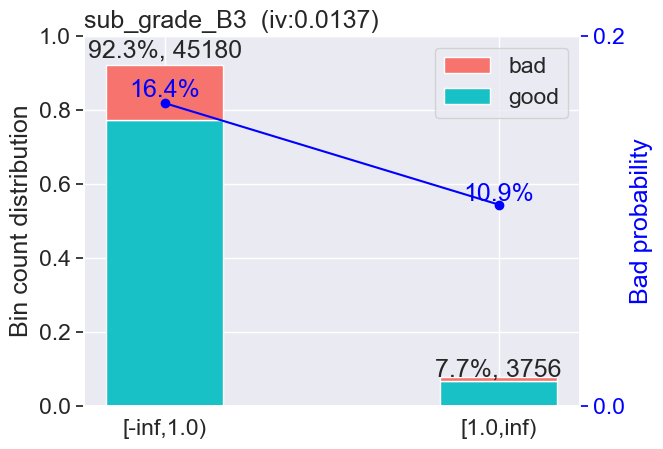

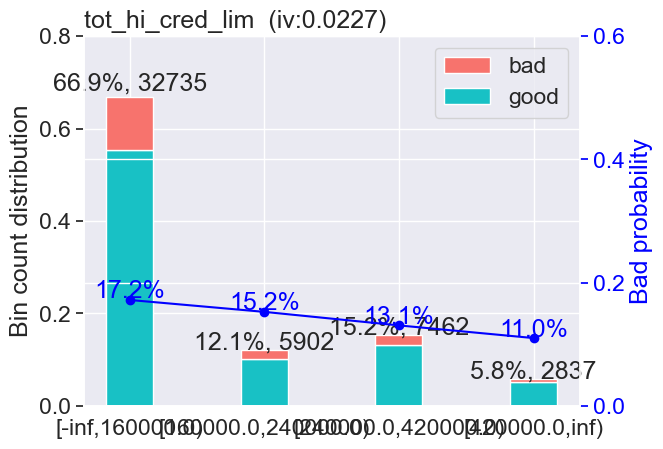

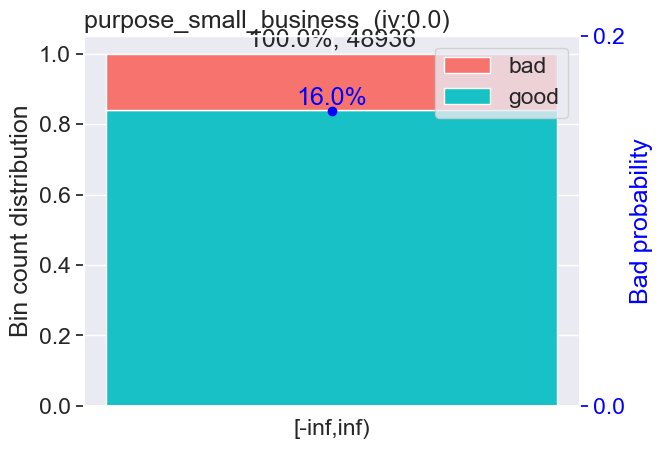

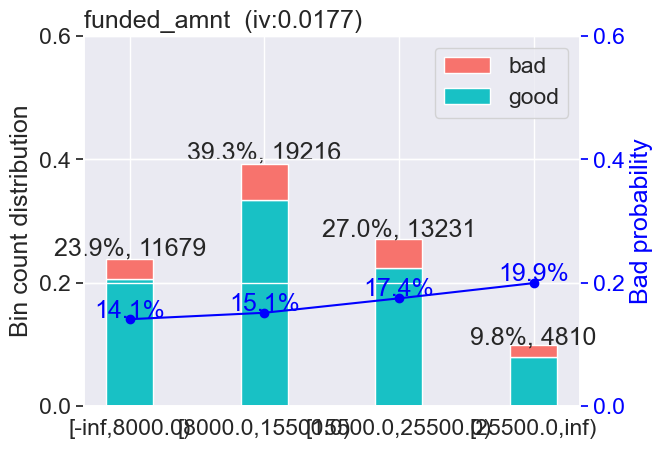

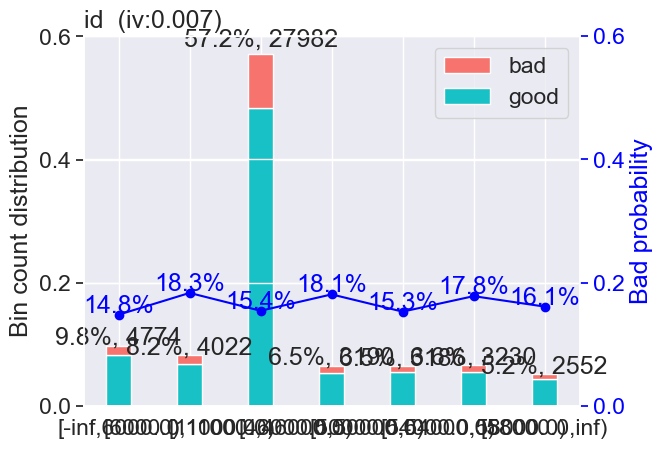

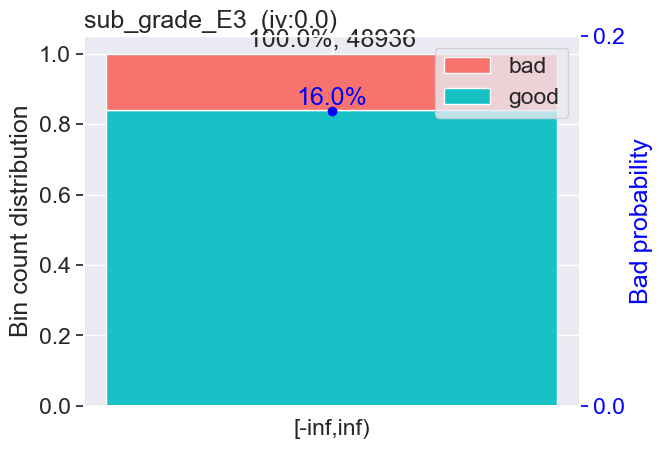

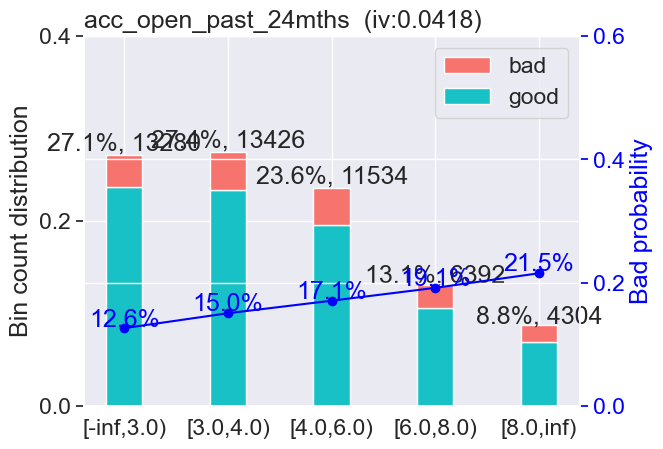

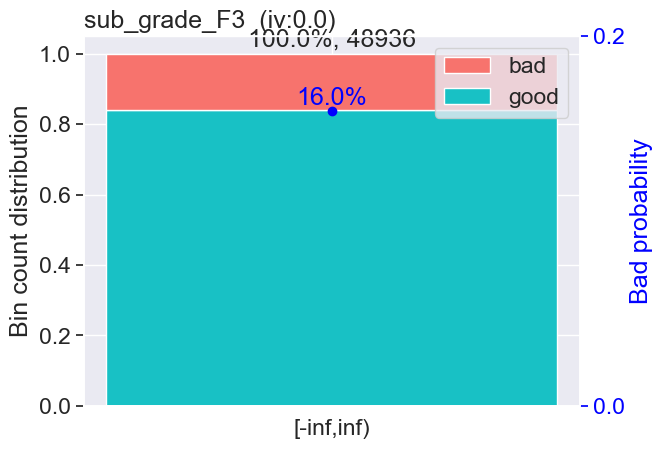

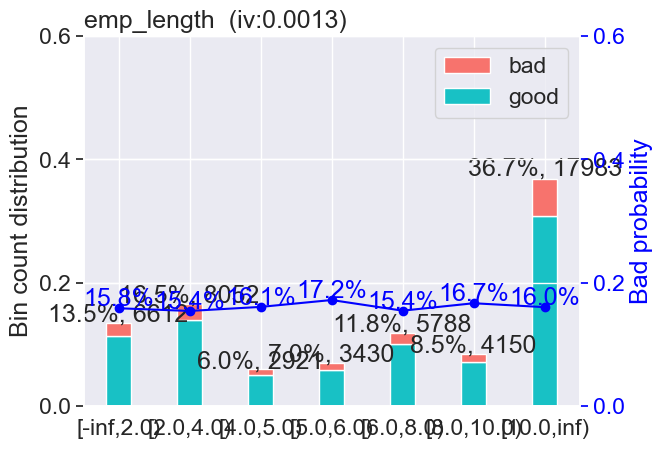

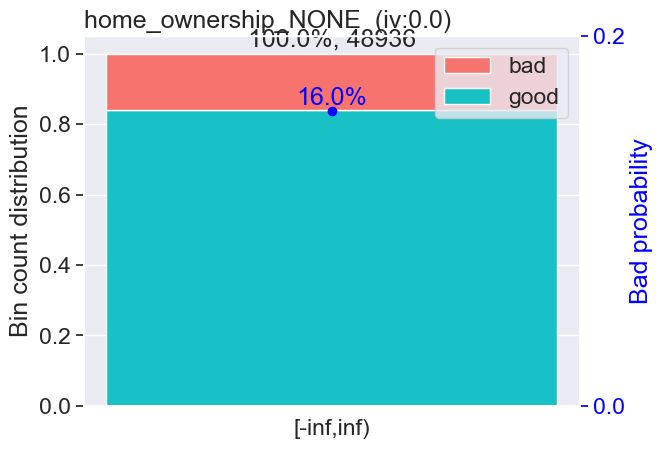

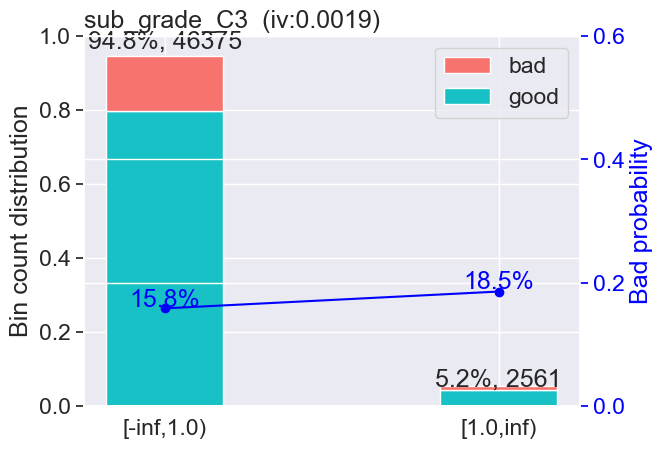

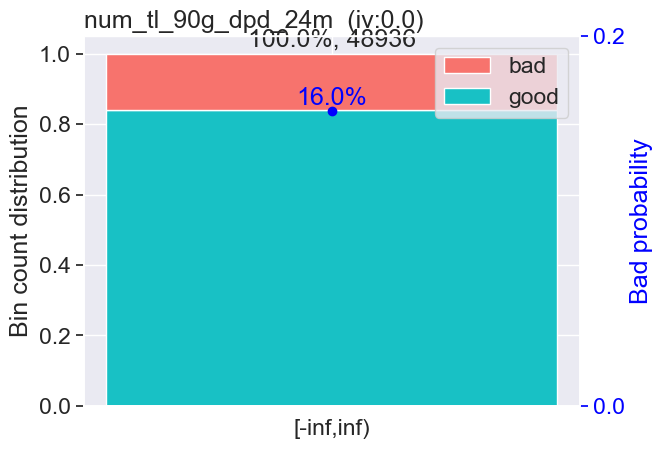

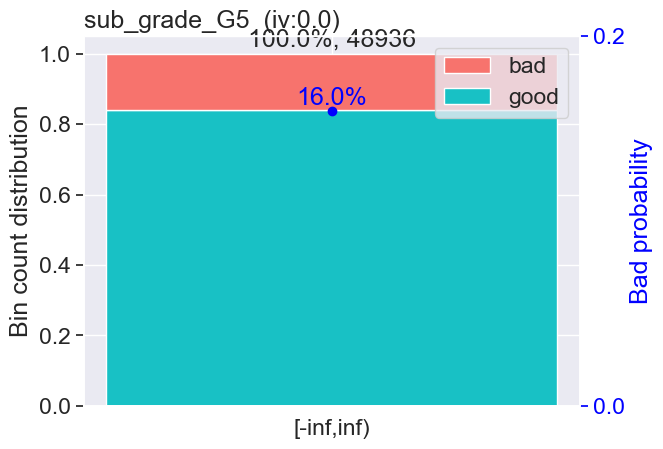

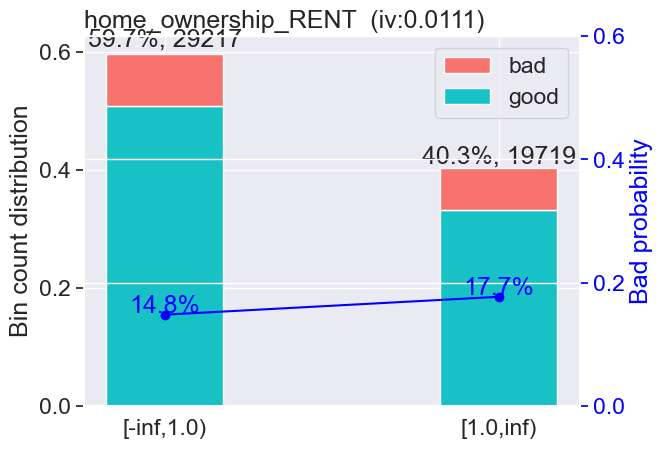

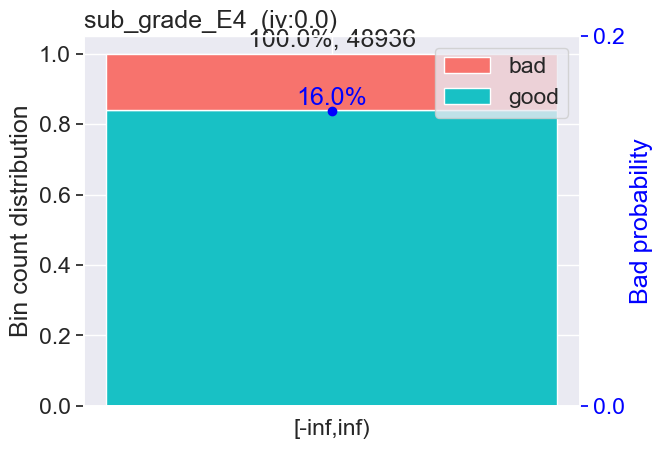

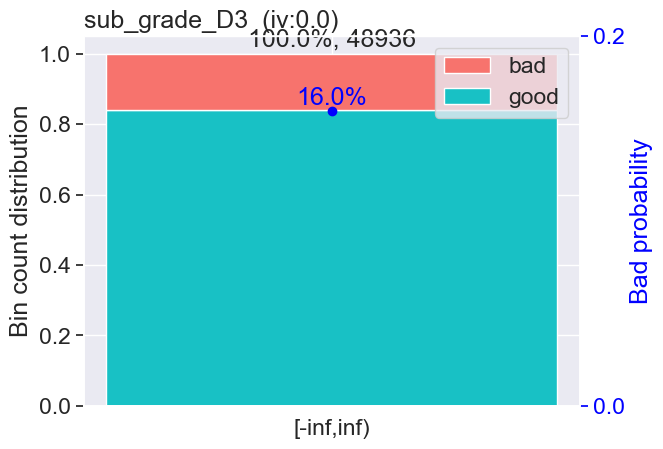

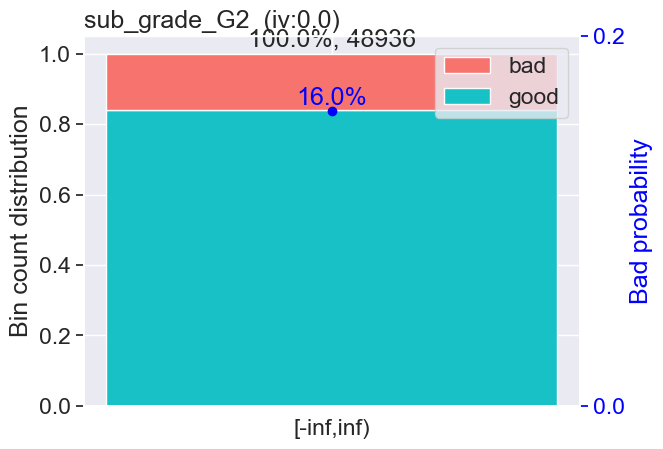

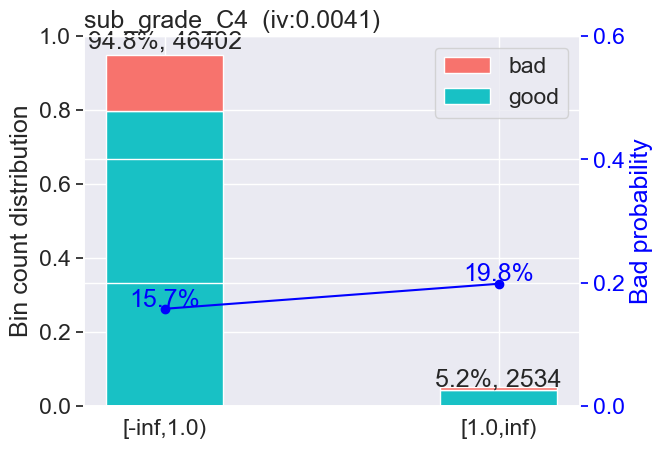

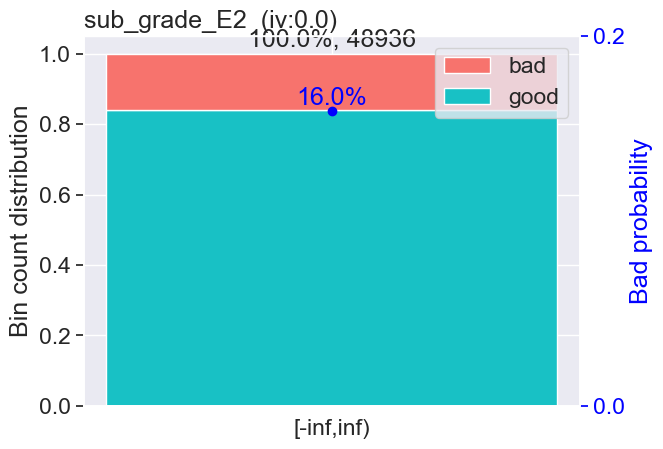

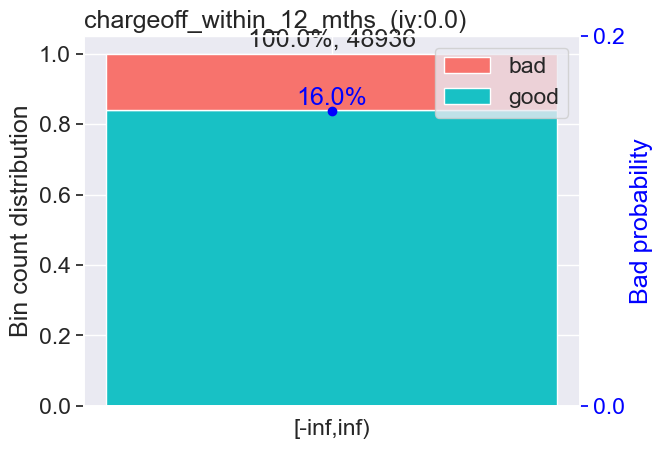

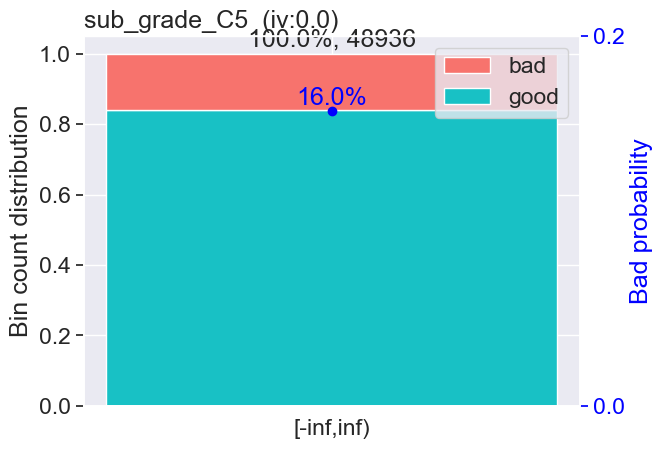

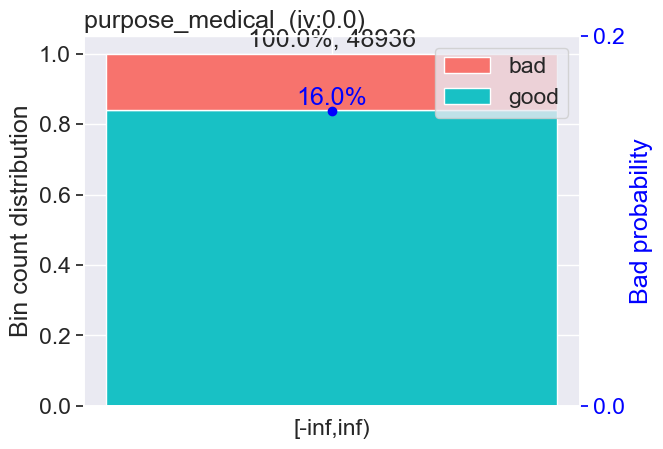

In [119]:
#bins_new = sc.woebin(df_r, y='def', positive = 'bad|1')
sc.woebin_plot(bins)
# converting train and test into woe values
df_r_woe = sc.woebin_ply(df_r, bins)
df_r_woe.stb.missing()

In [97]:
scaler = StandardScaler()
df_r_transformed = scaler.fit_transform(df_r.drop(['client_id'], axis=1))
df_r = pd.DataFrame(df_r_transformed, columns=df_r.drop(['client_id'], axis=1).columns)
df_r.head()

dti  funded_amnt  annual_inc    term  inq_last_6mths  delinq_2yrs  chargeoff_within_12_mths  num_accts_ever_120_pd  num_tl_90g_dpd_24m  acc_open_past_24mths  avg_cur_bal  tot_hi_cred_lim  delinq_amnt  sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  \
0  0.9442      -0.0048     -0.4287 -0.6941         -0.6836      -0.3718                   -0.0923                -0.3959             -0.1779               -0.1775      -0.3755          -0.6635      -0.0173       -0.1635       -0.1627       -0.2079        4.2968       -0.2156       -0.2224       -0.2402       -0.2470   
1 -0.7251       1.9367      1.7492  1.4408          1.4578       0.7013                   -0.0923                -0.3959             -0.1779               -0.1775       2.6611           2.7541      -0.0173       -0.1635       -0.1627       -0.2079       -0.2327       -0.2156       -0.2224       -0.2402       -0.2470   
2  1.0626      -1.0167     -0.4077 -0.6941         -0.6836      -0.3718                   -0.0923                -0.3959             -0.1779               -0.5062      -0.3030          -0.2937      -0.0173       -0.1635       -0.1627        4.8107       -0.2327       -0.2156       -0.2224       -0.2402       -0.2470   
3  0.8211      -0.0048     -0.0957 -0.6941         -0.6836       1.7745                   -0.0923                 1.1003              1.7157               -0.5062      -0.5177          -0.5819      -0.0173       -0.1635       -0.1627       -0.2079       -0.2327       -0.2156       -0.2224       -0.2402       -0.2470   
4 -1.4141      -1.4167      0.5469 -0.6941         -0.6836      -0.3718                   -0.0923                -0.3959             -0.1779               -0.8350       0.9846           0.6470      -0.0173       -0.1635       -0.1627       -0.2079       -0.2327       -0.2156       -0.2224       -0.2402       -0.2470   

   sub_grade_B5  sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  sub_grade_C5  sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  sub_grade_D5  sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  sub_grade_E5  sub_grade_F1  sub_grade_F2  sub_grade_F3  sub_grade_F4  sub_grade_F5  sub_grade_G1  \
0       -0.2380       -0.2546       -0.2539       -0.2483       -0.2447       -0.2257       -0.2132       -0.1951       -0.1837       -0.1795       -0.1629       -0.1561       -0.1469       -0.1316       -0.1182       -0.1107       -0.0898       -0.0755       -0.0693       -0.0613       -0.0512       -0.0484   
1       -0.2380       -0.2546       -0.2539       -0.2483        4.0863       -0.2257       -0.2132       -0.1951       -0.1837       -0.1795       -0.1629       -0.1561       -0.1469       -0.1316       -0.1182       -0.1107       -0.0898       -0.0755       -0.0693       -0.0613       -0.0512       -0.0484   
2       -0.2380       -0.2546       -0.2539       -0.2483       -0.2447       -0.2257       -0.2132       -0.1951       -0.1837       -0.1795       -0.1629       -0.1561       -0.1469       -0.1316       -0.1182       -0.1107       -0.0898       -0.0755       -0.0693       -0.0613       -0.0512       -0.0484   
3       -0.2380       -0.2546       -0.2539       -0.2483       -0.2447       -0.2257       -0.2132       -0.1951        5.4444       -0.1795       -0.1629       -0.1561       -0.1469       -0.1316       -0.1182       -0.1107       -0.0898       -0.0755       -0.0693       -0.0613       -0.0512       -0.0484   
4       -0.2380       -0.2546        3.9385       -0.2483       -0.2447       -0.2257       -0.2132       -0.1951       -0.1837       -0.1795       -0.1629       -0.1561       -0.1469       -0.1316       -0.1182       -0.1107       -0.0898       -0.0755       -0.0693       -0.0613       -0.0512       -0.0484   

   sub_grade_G2  sub_grade_G3  sub_grade_G4  sub_grade_G5  
0       -0.0373       -0.0384       -0.0282       -0.0291  
1       -0.0373       -0.0384       -0.0282       -0.0291  
2       -0.0373     

In [99]:
X_train_df=pd.DataFrame(X_train)
X_train_df.head()

annual_inc_woe  inq_last_6mths_woe  sub_grade_B2_woe  avg_cur_bal_woe  term_woe  sub_grade_B1_woe  dti_woe  acc_open_past_24mths_woe
0          0.0783             -0.1635            0.0341           0.0900   -0.2700            0.0306  -0.3409                   -0.0710
2         -0.2124              0.1653            0.0341           0.0900   -0.2700            0.0306   0.0633                   -0.0710
4          0.0783             -0.1635            0.0341           0.0900   -0.2700            0.0306  -0.3409                   -0.0710
5         -0.2124             -0.1635            0.0341           0.0900   -0.2700            0.0306   0.0633                   -0.0710
6         -0.4330              0.0922            0.0341           0.0900   -0.2700            0.0306  -0.1027                   -0.0710

In [101]:
X_train_df.columns

Index(['annual_inc_woe', 'inq_last_6mths_woe', 'sub_grade_B2_woe', 'avg_cur_bal_woe', 'term_woe', 'sub_grade_B1_woe', 'dti_woe', 'acc_open_past_24mths_woe'], dtype='object')

In [103]:
df_r_final = pd.DataFrame(df_r, columns=['acc_open_past_24mths', 'sub_grade_B2', 'annual_inc', 'dti', 
                                        'inq_last_6mths', 'sub_grade_B1', 'term',  'avg_cur_bal'])
df_r_final.head()

acc_open_past_24mths  sub_grade_B2  annual_inc     dti  inq_last_6mths  sub_grade_B1    term  avg_cur_bal
0               -0.1775       -0.2224     -0.4287  0.9442         -0.6836       -0.2156 -0.6941      -0.3755
1               -0.1775       -0.2224      1.7492 -0.7251          1.4578       -0.2156  1.4408       2.6611
2               -0.5062       -0.2224     -0.4077  1.0626         -0.6836       -0.2156 -0.6941      -0.3030
3               -0.5062       -0.2224     -0.0957  0.8211         -0.6836       -0.2156 -0.6941      -0.5177
4               -0.8350       -0.2224      0.5469 -1.4141         -0.6836       -0.2156 -0.6941       0.9846

In [105]:
df_r_final.rename(columns={'acc_open_past_24mths': 'acc_open_past_24mths_woe', 'sub_grade_B2': 'sub_grade_B2_woe', 'annual_inc': 'annual_inc_woe', 
                          'dti': 'dti_woe', 'inq_last_6mths': 'inq_last_6mths_woe', 'sub_grade_B1': 'sub_grade_B1_woe', 'term': 'term_woe',
                          'avg_cur_bal':'avg_cur_bal_woe'}, inplace=True)
df_r_final.head()

acc_open_past_24mths_woe  sub_grade_B2_woe  annual_inc_woe  dti_woe  inq_last_6mths_woe  sub_grade_B1_woe  term_woe  avg_cur_bal_woe
0                   -0.1775           -0.2224         -0.4287   0.9442             -0.6836           -0.2156   -0.6941          -0.3755
1                   -0.1775           -0.2224          1.7492  -0.7251              1.4578           -0.2156    1.4408           2.6611
2                   -0.5062           -0.2224         -0.4077   1.0626             -0.6836           -0.2156   -0.6941          -0.3030
3                   -0.5062           -0.2224         -0.0957   0.8211             -0.6836           -0.2156   -0.6941          -0.5177
4                   -0.8350           -0.2224          0.5469  -1.4141             -0.6836           -0.2156   -0.6941           0.9846

In [107]:
df_r_final=df_r_final[X_train_df.columns]

In [132]:
#X_train_df.drop(['id'],  axis=1)

### Modelling

In [109]:
real_prob = logreg.predict_proba(df_r_final)[:, 1]
real_pred = logreg.predict(df_r_final)
print(real_prob)
real_pred

[0.11968957 0.99732045 0.10693696 ... 0.19088011 0.99023621 0.98201794]


array([0, 1, 0, ..., 0, 1, 1])

#### Join the id

client_id
PD
rate_offered
PNL

In [127]:
df_r.head()

dti  funded_amnt  annual_inc    term  inq_last_6mths  delinq_2yrs  chargeoff_within_12_mths  num_accts_ever_120_pd  num_tl_90g_dpd_24m  acc_open_past_24mths  avg_cur_bal  tot_hi_cred_lim  delinq_amnt  sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  \
0  0.9442      -0.0048     -0.4287 -0.6941         -0.6836      -0.3718                   -0.0923                -0.3959             -0.1779               -0.1775      -0.3755          -0.6635      -0.0173       -0.1635       -0.1627       -0.2079        4.2968       -0.2156       -0.2224       -0.2402       -0.2470   
1 -0.7251       1.9367      1.7492  1.4408          1.4578       0.7013                   -0.0923                -0.3959             -0.1779               -0.1775       2.6611           2.7541      -0.0173       -0.1635       -0.1627       -0.2079       -0.2327       -0.2156       -0.2224       -0.2402       -0.2470   
2  1.0626      -1.0167     -0.4077 -0.6941         -0.6836      -0.3718                   -0.0923                -0.3959             -0.1779               -0.5062      -0.3030          -0.2937      -0.0173       -0.1635       -0.1627        4.8107       -0.2327       -0.2156       -0.2224       -0.2402       -0.2470   
3  0.8211      -0.0048     -0.0957 -0.6941         -0.6836       1.7745                   -0.0923                 1.1003              1.7157               -0.5062      -0.5177          -0.5819      -0.0173       -0.1635       -0.1627       -0.2079       -0.2327       -0.2156       -0.2224       -0.2402       -0.2470   
4 -1.4141      -1.4167      0.5469 -0.6941         -0.6836      -0.3718                   -0.0923                -0.3959             -0.1779               -0.8350       0.9846           0.6470      -0.0173       -0.1635       -0.1627       -0.2079       -0.2327       -0.2156       -0.2224       -0.2402       -0.2470   

   sub_grade_B5  sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  sub_grade_C5  sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  sub_grade_D5  sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  sub_grade_E5  sub_grade_F1  sub_grade_F2  sub_grade_F3  sub_grade_F4  sub_grade_F5  sub_grade_G1  \
0       -0.2380       -0.2546       -0.2539       -0.2483       -0.2447       -0.2257       -0.2132       -0.1951       -0.1837       -0.1795       -0.1629       -0.1561       -0.1469       -0.1316       -0.1182       -0.1107       -0.0898       -0.0755       -0.0693       -0.0613       -0.0512       -0.0484   
1       -0.2380       -0.2546       -0.2539       -0.2483        4.0863       -0.2257       -0.2132       -0.1951       -0.1837       -0.1795       -0.1629       -0.1561       -0.1469       -0.1316       -0.1182       -0.1107       -0.0898       -0.0755       -0.0693       -0.0613       -0.0512       -0.0484   
2       -0.2380       -0.2546       -0.2539       -0.2483       -0.2447       -0.2257       -0.2132       -0.1951       -0.1837       -0.1795       -0.1629       -0.1561       -0.1469       -0.1316       -0.1182       -0.1107       -0.0898       -0.0755       -0.0693       -0.0613       -0.0512       -0.0484   
3       -0.2380       -0.2546       -0.2539       -0.2483       -0.2447       -0.2257       -0.2132       -0.1951        5.4444       -0.1795       -0.1629       -0.1561       -0.1469       -0.1316       -0.1182       -0.1107       -0.0898       -0.0755       -0.0693       -0.0613       -0.0512       -0.0484   
4       -0.2380       -0.2546        3.9385       -0.2483       -0.2447       -0.2257       -0.2132       -0.1951       -0.1837       -0.1795       -0.1629       -0.1561       -0.1469       -0.1316       -0.1182       -0.1107       -0.0898       -0.0755       -0.0693       -0.0613       -0.0512       -0.0484   

   sub_grade_G2  sub_grade_G3  sub_grade_G4  sub_grade_G5  
0       -0.0373       -0.0384       -0.0282       -0.0291  
1       -0.0373       -0.0384       -0.0282       -0.0291  
2       -0.0373     

In [111]:
df_r_final['client_id'] = df_real['client_id']
df_r_final = df_r_final.reindex(columns=['client_id'] + [col for col in df_r_final.columns if col != 'client_id'])
df_r_final.head()

client_id  annual_inc_woe  inq_last_6mths_woe  sub_grade_B2_woe  avg_cur_bal_woe  term_woe  sub_grade_B1_woe  dti_woe  acc_open_past_24mths_woe
0          0         -0.4287             -0.6836           -0.2224          -0.3755   -0.6941           -0.2156   0.9442                   -0.1775
1          1          1.7492              1.4578           -0.2224           2.6611    1.4408           -0.2156  -0.7251                   -0.1775
2          2         -0.4077             -0.6836           -0.2224          -0.3030   -0.6941           -0.2156   1.0626                   -0.5062
3          3         -0.0957             -0.6836           -0.2224          -0.5177   -0.6941           -0.2156   0.8211                   -0.5062
4          4          0.5469             -0.6836           -0.2224           0.9846   -0.6941           -0.2156  -1.4141                   -0.8350

In [113]:
PD = pd.DataFrame(real_prob)
print(len(PD))
print(len(df_r_final))
df_r_final['PD'] = PD
df_r_final['real_pred'] = real_pred
df_r_final.head()

60333
60333


client_id  annual_inc_woe  inq_last_6mths_woe  sub_grade_B2_woe  avg_cur_bal_woe  term_woe  sub_grade_B1_woe  dti_woe  acc_open_past_24mths_woe     PD  real_pred
0          0         -0.4287             -0.6836           -0.2224          -0.3755   -0.6941           -0.2156   0.9442                   -0.1775 0.1197          0
1          1          1.7492              1.4578           -0.2224           2.6611    1.4408           -0.2156  -0.7251                   -0.1775 0.9973          1
2          2         -0.4077             -0.6836           -0.2224          -0.3030   -0.6941           -0.2156   1.0626                   -0.5062 0.1069          0
3          3         -0.0957             -0.6836           -0.2224          -0.5177   -0.6941           -0.2156   0.8211                   -0.5062 0.1135          0
4          4          0.5469             -0.6836           -0.2224           0.9846   -0.6941           -0.2156  -1.4141                   -0.8350 0.1757          0

In [115]:
result=pd.DataFrame(df_r_final, columns=['client_id', 'real_pred', 'PD'])
result.sample(5)

client_id  real_pred     PD
33130      33130          1 0.5207
50559      50559          0 0.2254
39716      39716          1 0.8055
11328      11328          0 0.0508
33775      33775          1 0.9964

# Also here can be apply decision strategy, like:

PNL = FV-PD*0.6*FV-(1+f_n)^n*S

PNL = FV*0.4*PD -1.08^n*S

FV = ((1+r0)^n-1)/r0 * (r_n(1+r_n)^n)/((1+r_n)^n-1)

R = r_n (rate) - ?

FV = (((1,08)^n-1)/0.08) * (R*(1+R)^n/((1+R)^n-1)) * S